In [ ]:
pip install scikit-learn matplotlib seaborn

In [ ]:
pip install pandas faker numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.4 MB/s eta 0:00:00


In [ ]:
pip install scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Set up Faker
fake = Faker('en_GB')

# Define lists for additional randomization
industries = [
    'Finance', 'Tech', 'Food & Beverage',
    'Retail', 'Travel'
]

international_regions = [
    'Europe', 'North America', 'Asia Pacific',
    'Middle East', 'Developed Markets'
]

def generate_sales_data(num_entries=200):
    data = []

    for _ in range(num_entries):
        # Company details
        company_name = fake.company()
        hq_location = random.choice([
            'London', 'Manchester', 'Edinburgh',
            'Birmingham', 'Bristol', 'Leeds'
        ])
        industry = random.choice(industries)

        # Financial details
        annual_revenue = round(np.random.uniform(5, 500), 2)
        company_size = random.choice([
            '50-100 employees',
            '100-250 employees',
            '250-500 employees',
            '500-1000 employees'
        ])
        international_exposure = random.choice(international_regions)

        # FX details
        fx_volume = round(np.random.uniform(1, 50), 2)
        lead_score = random.randint(50, 95)

        # Contact details
        first_name = fake.first_name()
        last_name = fake.last_name()
        contact_name = f"{first_name} {last_name}"
        email = f"{first_name.lower()}.{last_name.lower()}@{company_name.replace(' ', '').lower()}.co.uk"

        # Customize contact positions based on industry
        contact_positions = {
            'Finance': ['CFO', 'Financial Director', 'Head of Treasury', 'Finance Manager'],
            'Tech': ['CTO', 'Head of Operations', 'Chief Innovation Officer', 'IT Director'],
            'Food & Beverage': ['Operations Director', 'Supply Chain Manager', 'Procurement Head', 'CEO'],
            'Retail': ['Retail Operations Director', 'Procurement Manager', 'Supply Chain Director', 'Commercial Director'],
            'Travel': ['Operations Director', 'Chief Commercial Officer', 'Head of International Operations', 'Strategy Director']
        }

        contact_position = random.choice(contact_positions[industry])
        phone_number = fake.phone_number()

        # Create entry
        entry = {
            'Company Name': company_name,
            'Company HQ': hq_location,
            'Industry': industry,
            'Annual Revenue (£M)': annual_revenue,
            'Company Size': company_size,
            'International Exposure': international_exposure,
            'Current FX Volume (£M)': fx_volume,
            'Potential Lead Score': lead_score,
            'Contact Name': contact_name,
            'Contact Email': email,
            'Contact Position': contact_position,
            'Phone Number': phone_number
        }

        data.append(entry)

    # Convert to DataFrame
    df = pd.DataFrame(data)
    return df

# Generate and save the dataset
sales_data = generate_sales_data()

# Save to CSV (optional)
sales_data.to_csv('fx_sales_leads.csv', index=False)

# Display first few rows
print(sales_data.head())

# Optional: Show industry distribution
print("\nIndustry Distribution:")
print(sales_data['Industry'].value_counts())

                Company Name  Company HQ         Industry  \
0   Kaur, Rhodes and Jenkins  Manchester           Retail   
1               Thompson Inc     Bristol          Finance   
2                 Slater PLC   Edinburgh          Finance   
3  Doherty, Harris and Smith     Bristol  Food & Beverage   
4    Wood, Curtis and Morley     Bristol  Food & Beverage   

   Annual Revenue (£M)        Company Size International Exposure  \
0               406.75  500-1000 employees            Middle East   
1               201.33   250-500 employees      Developed Markets   
2               144.81   250-500 employees           Asia Pacific   
3               471.63   100-250 employees                 Europe   
4               203.11  500-1000 employees          North America   

   Current FX Volume (£M)  Potential Lead Score    Contact Name  \
0                   43.84                    66      Abdul Kaur   
1                    1.83                    74     Joanne Rees   
2                

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        33

    accuracy                           0.95        40
   macro avg       0.97      0.86      0.90        40
weighted avg       0.95      0.95      0.95        40



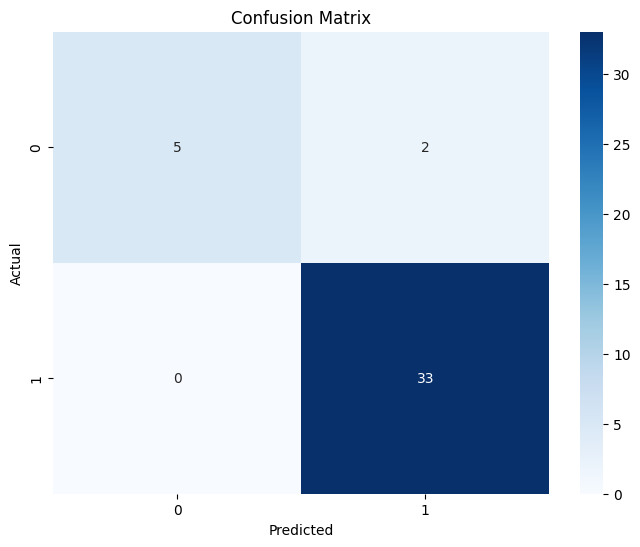


Suitable Clients:
                   Company Name         Industry  Current FX Volume (£M)  \
1                 Gordon-Wilson           Travel                   11.39   
2    Townsend, Gordon and Brown           Travel                   19.28   
3                   Preston LLC  Food & Beverage                    8.76   
4                      Bull Ltd             Tech                   17.90   
5                      Hall PLC          Finance                   39.03   
..                          ...              ...                     ...   
192               Gallagher Ltd           Travel                   16.09   
194             Hill-Hutchinson  Food & Beverage                   23.41   
196  Harrison, Smith and Waters  Food & Beverage                   27.65   
198   James, Cooper and Jenkins  Food & Beverage                    9.66   
199  Conway, Stephens and Bryan             Tech                   19.46   

     Target  
1         1  
2         1  
3         1  
4         1 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def generate_sales_data(num_entries=200):
    fake = Faker('en_GB')

    industries = [
        'Finance', 'Tech', 'Food & Beverage',
        'Retail', 'Travel'
    ]

    international_regions = [
        'Europe', 'North America', 'Asia Pacific',
        'Middle East', 'Developed Markets'
    ]

    data = []

    for _ in range(num_entries):
        # Company details
        company_name = fake.company()
        hq_location = random.choice([
            'London', 'Manchester', 'Edinburgh',
            'Birmingham', 'Bristol', 'Leeds'
        ])
        industry = random.choice(industries)

        # Financial details
        annual_revenue = round(np.random.uniform(5, 500), 2)
        company_size = random.choice([
            '50-100 employees',
            '100-250 employees',
            '250-500 employees',
            '500-1000 employees'
        ])
        international_exposure = random.choice(international_regions)

        # FX details
        fx_volume = round(np.random.uniform(1, 50), 2)
        lead_score = random.randint(50, 95)

        # Contact details
        first_name = fake.first_name()
        last_name = fake.last_name()
        contact_name = f"{first_name} {last_name}"
        email = f"{first_name.lower()}.{last_name.lower()}@{company_name.replace(' ', '').lower()}.co.uk"

        # Customize contact positions based on industry
        contact_positions = {
            'Finance': ['CFO', 'Financial Director', 'Head of Treasury', 'Finance Manager'],
            'Tech': ['CTO', 'Head of Operations', 'Chief Innovation Officer', 'IT Director'],
            'Food & Beverage': ['Operations Director', 'Supply Chain Manager', 'Procurement Head', 'CEO'],
            'Retail': ['Retail Operations Director', 'Procurement Manager', 'Supply Chain Director', 'Commercial Director'],
            'Travel': ['Operations Director', 'Chief Commercial Officer', 'Head of International Operations', 'Strategy Director']
        }

        contact_position = random.choice(contact_positions[industry])
        phone_number = fake.phone_number()

        # Create entry
        entry = {
            'Company Name': company_name,
            'Company HQ': hq_location,
            'Industry': industry,
            'Annual Revenue (£M)': annual_revenue,
            'Company Size': company_size,
            'International Exposure': international_exposure,
            'Current FX Volume (£M)': fx_volume,
            'Potential Lead Score': lead_score,
            'Contact Name': contact_name,
            'Contact Email': email,
            'Contact Position': contact_position,
            'Phone Number': phone_number
        }

        data.append(entry)

    # Convert to DataFrame
    df = pd.DataFrame(data)
    return df

# Create target variable based on FX exposure
def create_target_variable(df):
    # Target: Companies with FX exposure between 3-40 million
    df['Target'] = ((df['Current FX Volume (£M)'] >= 3) &
                    (df['Current FX Volume (£M)'] <= 40)).astype(int)
    return df

# Prepare data for KNN classification
def prepare_data_for_knn(df):
    # Select features for classification
    features = [
        'Annual Revenue (£M)',
        'Potential Lead Score',
        'Current FX Volume (£M)'
    ]

    # Prepare X (features) and y (target)
    X = df[features]
    y = df['Target']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler

# Perform KNN Classification
def perform_knn_classification(X_scaled, y, n_neighbors=5):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # Create and train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    return knn, X_test, y_test, y_pred

# Visualize results
def visualize_results(X_scaled, y, knn, scaler):
    # Create a grid of points
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict for each point in the grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, alpha=0.8)
    plt.title('KNN Classification of Potential Clients')
    plt.xlabel('Scaled Annual Revenue')
    plt.ylabel('Scaled Potential Lead Score')
    plt.show()

# Main execution
def main():
    # Generate sales data
    global_sales_data = generate_sales_data()

    # Add target variable
    global_sales_data = create_target_variable(global_sales_data)

    # Prepare data for KNN
    X_scaled, y, scaler = prepare_data_for_knn(global_sales_data)

    # Perform classification
    knn, X_test, y_test, y_pred = perform_knn_classification(X_scaled, y)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Identify suitable clients
    suitable_clients = global_sales_data[global_sales_data['Target'] == 1]
    print("\nSuitable Clients:")
    print(suitable_clients[['Company Name', 'Industry', 'Current FX Volume (£M)', 'Target']])

    # Additional insights
    print("\nSuitable Clients by Industry:")
    print(suitable_clients['Industry'].value_counts())

# Imports at the top
from faker import Faker
import random

# Run the main function
if __name__ == "__main__":
    main()


In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn plotly

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.93      0.93      0.93        29

    accuracy                           0.90        40
   macro avg       0.87      0.87      0.87        40
weighted avg       0.90      0.90      0.90        40



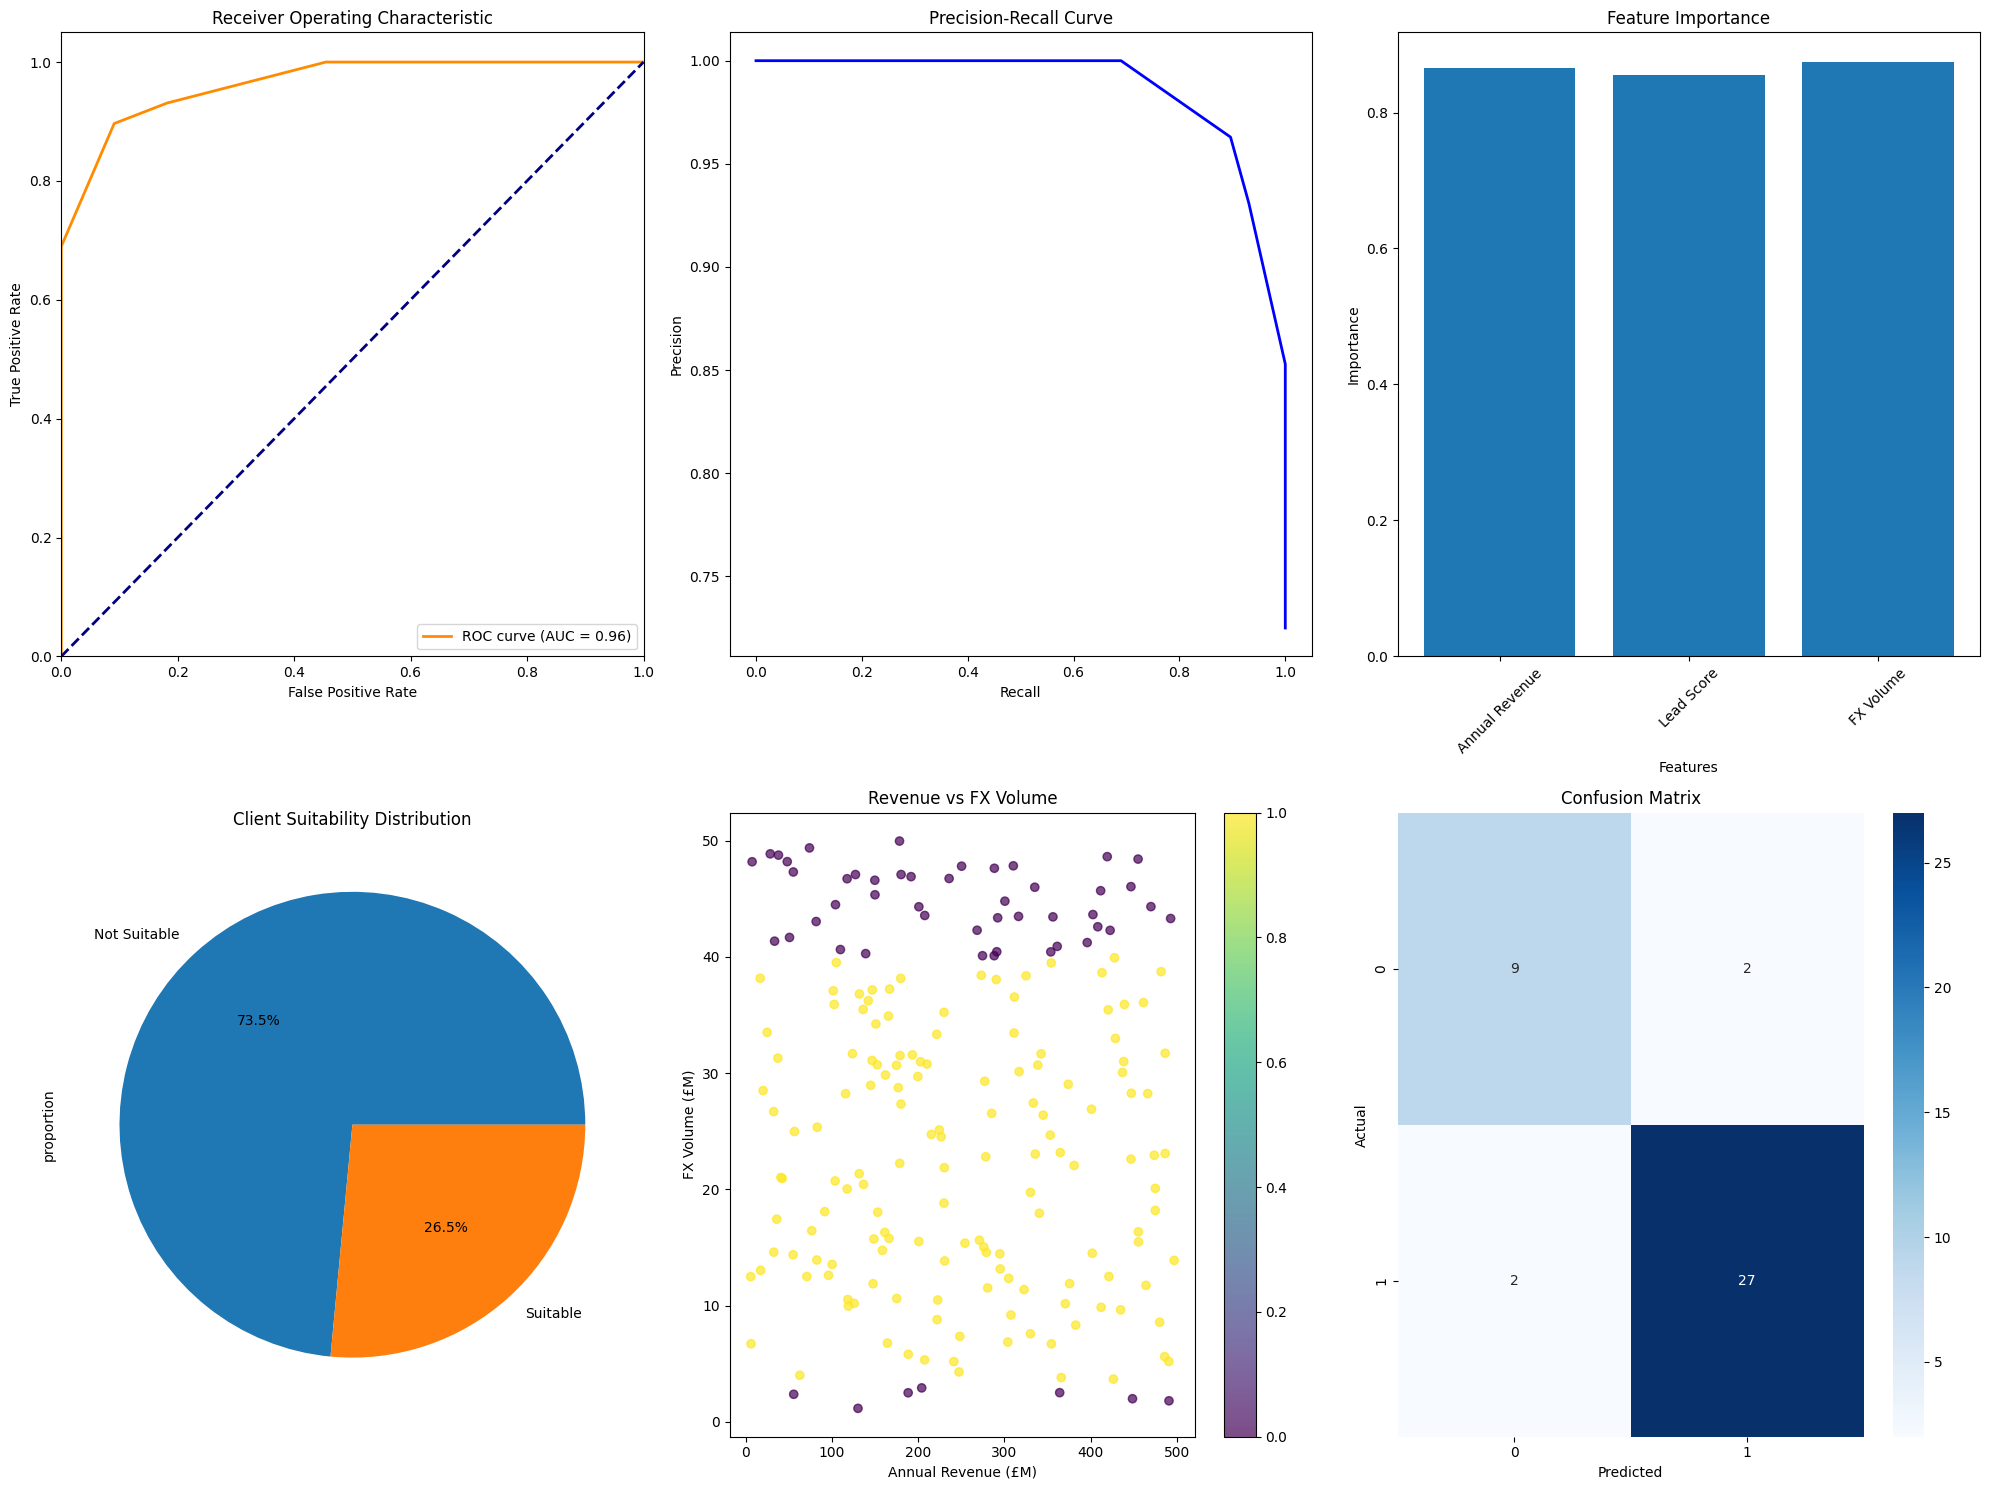

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)
import plotly.express as px
import plotly.io as pio

# Ensure plots are displayed
plt.rcParams['figure.figsize'] = (20, 15)

def generate_sales_data(num_entries=200):
    from faker import Faker
    import random

    fake = Faker('en_GB')

    industries = [
        'Finance', 'Tech', 'Food & Beverage',
        'Retail', 'Travel'
    ]

    international_regions = [
        'Europe', 'North America', 'Asia Pacific',
        'Middle East', 'Developed Markets'
    ]

    data = []

    for _ in range(num_entries):
        # Company details
        company_name = fake.company()
        hq_location = random.choice([
            'London', 'Manchester', 'Edinburgh',
            'Birmingham', 'Bristol', 'Leeds'
        ])
        industry = random.choice(industries)

        # Financial details
        annual_revenue = round(np.random.uniform(5, 500), 2)
        company_size = random.choice([
            '50-100 employees',
            '100-250 employees',
            '250-500 employees',
            '500-1000 employees'
        ])
        international_exposure = random.choice(international_regions)

        # FX details
        fx_volume = round(np.random.uniform(1, 50), 2)
        lead_score = random.randint(50, 95)

        # Contact details
        first_name = fake.first_name()
        last_name = fake.last_name()
        contact_name = f"{first_name} {last_name}"
        email = f"{first_name.lower()}.{last_name.lower()}@{company_name.replace(' ', '').lower()}.co.uk"

        # Customize contact positions based on industry
        contact_positions = {
            'Finance': ['CFO', 'Financial Director', 'Head of Treasury', 'Finance Manager'],
            'Tech': ['CTO', 'Head of Operations', 'Chief Innovation Officer', 'IT Director'],
            'Food & Beverage': ['Operations Director', 'Supply Chain Manager', 'Procurement Head', 'CEO'],
            'Retail': ['Retail Operations Director', 'Procurement Manager', 'Supply Chain Director', 'Commercial Director'],
            'Travel': ['Operations Director', 'Chief Commercial Officer', 'Head of International Operations', 'Strategy Director']
        }

        contact_position = random.choice(contact_positions[industry])
        phone_number = fake.phone_number()

        # Create entry
        entry = {
            'Company Name': company_name,
            'Company HQ': hq_location,
            'Industry': industry,
            'Annual Revenue (£M)': annual_revenue,
            'Company Size': company_size,
            'International Exposure': international_exposure,
            'Current FX Volume (£M)': fx_volume,
            'Potential Lead Score': lead_score,
            'Contact Name': contact_name,
            'Contact Email': email,
            'Contact Position': contact_position,
            'Phone Number': phone_number
        }

        data.append(entry)

    # Convert to DataFrame
    df = pd.DataFrame(data)
    return df

def create_target_variable(df):
    # Target: Companies with FX exposure between 3-40 million
    df['Target'] = ((df['Current FX Volume (£M)'] >= 3) &
                    (df['Current FX Volume (£M)'] <= 40)).astype(int)
    return df

def prepare_data_for_knn(df):
    # Select features for classification
    features = [
        'Annual Revenue (£M)',
        'Potential Lead Score',
        'Current FX Volume (£M)'
    ]

    # Prepare X (features) and y (target)
    X = df[features]
    y = df['Target']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler

def perform_knn_classification(X_scaled, y, n_neighbors=5):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # Create and train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    return knn, X_test, y_test, y_pred

def advanced_visualization(global_sales_data, X_scaled, y, knn, X_test, y_test, y_pred):
    # Create a figure with subplots
    fig, axs = plt.subplots(2, 3, figsize=(20, 15))

    # 1. ROC Curve
    y_pred_proba = knn.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2,
                   label=f'ROC curve (AUC = {roc_auc:.2f})')
    axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[0, 0].set_xlim([0.0, 1.0])
    axs[0, 0].set_ylim([0.0, 1.05])
    axs[0, 0].set_xlabel('False Positive Rate')
    axs[0, 0].set_ylabel('True Positive Rate')
    axs[0, 0].set_title('Receiver Operating Characteristic')
    axs[0, 0].legend(loc="lower right")

    # 2. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    axs[0, 1].plot(recall, precision, color='blue', lw=2)
    axs[0, 1].set_xlabel('Recall')
    axs[0, 1].set_ylabel('Precision')
    axs[0, 1].set_title('Precision-Recall Curve')

    # 3. Feature Importance Visualization
    feature_names = ['Annual Revenue', 'Lead Score', 'FX Volume']
    feature_importances = np.abs(StandardScaler().fit_transform(
        global_sales_data[['Annual Revenue (£M)', 'Potential Lead Score', 'Current FX Volume (£M)']]
    )).mean(axis=0)

    axs[0, 2].bar(feature_names, feature_importances)
    axs[0, 2].set_title('Feature Importance')
    axs[0, 2].set_xlabel('Features')
    axs[0, 2].set_ylabel('Importance')
    axs[0, 2].tick_params(axis='x', rotation=45)

    # 4. Distribution of Target Variable
    target_dist = global_sales_data['Target'].value_counts(normalize=True)
    target_dist.plot(kind='pie', ax=axs[1, 0], autopct='%1.1f%%',
                     labels=['Not Suitable', 'Suitable'])
    axs[1, 0].set_title('Client Suitability Distribution')

    # 5. Scatter Plot of Key Features
    scatter = axs[1, 1].scatter(
        global_sales_data['Annual Revenue (£M)'],
        global_sales_data['Current FX Volume (£M)'],
        c=global_sales_data['Target'],
        cmap='viridis',
        alpha=0.7
    )
    plt.colorbar(scatter, ax=axs[1, 1])
    axs[1, 1].set_title('Revenue vs FX Volume')
    axs[1, 1].set_xlabel('Annual Revenue (£M)')
    axs[1, 1].set_ylabel('FX Volume (£M)')

    # 6. Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[1, 2])
    axs[1, 2].set_title('Confusion Matrix')
    axs[1, 2].set_xlabel('Predicted')
    axs[1, 2].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # Interactive Plotly Visualization
    fig = px.scatter_3d(
        global_sales_data,
        x='Annual Revenue (£M)',
        y='Potential Lead Score',
        z='Current FX Volume (£M)',
        color='Target',
        hover_data=['Company Name', 'Industry'],
        title='Interactive Client Suitability Visualization'
    )

    # Attempt to show the plot (works differently based on environment)
    try:
        fig.show()
    except Exception as e:
        print("Could not display interactive plot:", e)
        # Save as HTML as an alternative
        pio.write_html(fig, file='interactive_plot.html')
        print("Interactive plot saved as interactive_plot.html")

def main():
    # Generate sales data
    global_sales_data = generate_sales_data()

    # Add target variable
    global_sales_data = create_target_variable(global_sales_data)

    # Prepare data for KNN
    X_scaled, y, scaler = prepare_data_for_knn(global_sales_data)

    # Perform classification
    knn, X_test, y_test, y_pred = perform_knn_classification(X_scaled, y)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Advanced visualization
    advanced_visualization(
        global_sales_data,
        X_scaled,
        y,
        knn,
        X_test,
        y_test,
        y_pred
    )

# Run the script
if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

# Set up the Faker instance
fake = Faker('en_GB')

def generate_fx_sales_data(num_entries=200):
    data = []

    # Define lists for consistent data generation
    uk_cities = [
        'London', 'Manchester', 'Birmingham', 'Edinburgh',
        'Bristol', 'Leeds', 'Glasgow', 'Cambridge', 'Oxford'
    ]

    industries = [
        'Manufacturing', 'Technology', 'Retail',
        'Professional Services', 'Healthcare',
        'Consumer Goods', 'Energy', 'Media'
    ]

    overseas_markets = [
        'European Union', 'North America', 'Asia Pacific',
        'Western Europe', 'Nordics', 'Australia/NZ'
    ]

    currencies_traded = ['EUR', 'USD', 'JPY', 'CHF', 'AUD', 'CAD', 'SEK', 'NOK']

    for _ in range(num_entries):
        # Company Details
        company_name = fake.company()
        hq_location = random.choice(uk_cities)
        industry = random.choice(industries)
        year_established = random.randint(1950, 2015)

        # Financial Metrics
        annual_revenue = round(random.uniform(10, 500), 2)  # In millions GBP
        market_cap = round(annual_revenue * random.uniform(1.5, 4), 2)  # In millions GBP
        employees = random.choice([50, 100, 250, 500, 1000, 2000, 5000])

        # FX Trading Profile
        monthly_fx_volume = round(random.uniform(1, 50), 2)  # In millions GBP
        primary_currency_pair = random.choice(currencies_traded) + '/GBP'
        num_currency_pairs_traded = random.randint(1, 6)

        # International Exposure
        primary_overseas_market = random.choice(overseas_markets)
        num_overseas_subsidiaries = random.randint(1, 8)
        export_revenue_percentage = random.randint(10, 70)

        # Risk Metrics
        credit_rating = random.choice(['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+'])
        risk_score = random.randint(65, 95)  # Higher is better

        # Sales Pipeline Data
        last_transaction_date = fake.date_between(
            start_date='-6M',
            end_date='today'
        )
        potential_annual_revenue = round(monthly_fx_volume * 12 * random.uniform(0.002, 0.004), 2)
        lead_score = random.randint(1, 100)

        # Contact Information
        contact_name = fake.name()
        contact_position = random.choice([
            'Treasury Manager', 'CFO', 'Finance Director',
            'Head of Finance', 'Financial Controller'
        ])
        contact_email = f"{contact_name.lower().replace(' ', '.')}@{company_name.lower().replace(' ', '')}.co.uk"
        contact_phone = fake.phone_number()

        # Create entry
        entry = {
            'Company Name': company_name,
            'HQ Location': hq_location,
            'Industry': industry,
            'Year Established': year_established,
            'Annual Revenue (£M)': annual_revenue,
            'Market Cap (£M)': market_cap,
            'Employees': employees,
            'Monthly FX Volume (£M)': monthly_fx_volume,
            'Primary Currency Pair': primary_currency_pair,
            'Number of Currency Pairs': num_currency_pairs_traded,
            'Primary Overseas Market': primary_overseas_market,
            'Number of Overseas Subsidiaries': num_overseas_subsidiaries,
            'Export Revenue %': export_revenue_percentage,
            'Credit Rating': credit_rating,
            'Risk Score': risk_score,
            'Last Transaction Date': last_transaction_date,
            'Potential Annual Revenue (£M)': potential_annual_revenue,
            'Lead Score': lead_score,
            'Contact Name': contact_name,
            'Contact Position': contact_position,
            'Contact Email': contact_email,
            'Contact Phone': contact_phone
        }

        data.append(entry)

    return pd.DataFrame(data)

# Generate the data
fx_sales_data = generate_fx_sales_data()

# Display the first few rows and basic statistics
print("\nFirst few rows of the dataset:")
print(fx_sales_data.head())

print("\nDataset Info:")
print(fx_sales_data.info())

print("\nBasic Statistics:")
print(fx_sales_data.describe())

# Save to CSV (optional)
fx_sales_data.to_csv('fx_sales_data.csv', index=False)


First few rows of the dataset:
                Company Name HQ Location        Industry  Year Established  \
0               Brown-Taylor  Birmingham          Energy              1996   
1  Whittaker, Ford and Payne     Glasgow      Healthcare              1952   
2                Andrews Ltd  Birmingham   Manufacturing              1967   
3                 Brooks PLC  Birmingham          Energy              1994   
4              Henderson LLC     Bristol  Consumer Goods              1986   

   Annual Revenue (£M)  Market Cap (£M)  Employees  Monthly FX Volume (£M)  \
0               145.93           556.70       2000                   14.39   
1                15.46            58.86       5000                   30.51   
2               453.44           884.15       2000                    5.78   
3               352.20           824.34        500                   11.83   
4               311.71           634.73        100                   17.15   

  Primary Currency Pair  Numbe

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

# Set up the Faker instance
fake = Faker('en_GB')

def generate_fx_sales_data(num_entries=200):
    data = []

    # Define lists for consistent data generation
    uk_cities = [
        'London', 'Manchester', 'Birmingham', 'Edinburgh',
        'Bristol', 'Leeds', 'Glasgow', 'Cambridge', 'Oxford'
    ]

    industries = [
        'Finance', 'Tech', 'Food & Beverage',
        'Retail', 'Travel'
    ]

    # Industry-specific company prefixes for more realistic names
    industry_prefixes = {
        'Finance': ['Global Bank', 'Capital', 'Investment', 'Financial', 'Asset'],
        'Tech': ['Digital', 'Tech', 'Software', 'Cloud', 'Cyber'],
        'Food & Beverage': ['Fresh', 'Gourmet', 'Foods', 'Beverages', 'Culinary'],
        'Retail': ['Retail', 'Store', 'Shopping', 'Mart', 'Commerce'],
        'Travel': ['Travel', 'Holiday', 'Tours', 'Voyage', 'Adventure']
    }

    overseas_markets = [
        'European Union', 'North America', 'Asia Pacific',
        'Western Europe', 'Nordics', 'Australia/NZ'
    ]

    currencies_traded = ['EUR', 'USD', 'JPY', 'CHF', 'AUD', 'CAD', 'SEK', 'NOK']

    # Industry-specific revenue ranges
    revenue_ranges = {
        'Finance': (50, 500),
        'Tech': (20, 400),
        'Food & Beverage': (10, 300),
        'Retail': (15, 350),
        'Travel': (5, 250)
    }

    for _ in range(num_entries):
        # Select industry first to maintain consistency
        industry = random.choice(industries)

        # Generate industry-appropriate company name
        prefix = random.choice(industry_prefixes[industry])
        company_name = f"{prefix} {fake.company()}"

        # Company Details
        hq_location = random.choice(uk_cities)
        year_established = random.randint(1950, 2015)

        # Financial Metrics - adjusted by industry
        min_rev, max_rev = revenue_ranges[industry]
        annual_revenue = round(random.uniform(min_rev, max_rev), 2)  # In millions GBP
        market_cap = round(annual_revenue * random.uniform(1.5, 4), 2)  # In millions GBP
        employees = random.choice([50, 100, 250, 500, 1000, 2000, 5000])

        # FX Trading Profile - adjusted by industry
        fx_multiplier = {
            'Finance': 1.5,
            'Tech': 1.2,
            'Food & Beverage': 0.8,
            'Retail': 0.9,
            'Travel': 1.1
        }

        monthly_fx_volume = round(random.uniform(1, 50) * fx_multiplier[industry], 2)
        primary_currency_pair = random.choice(currencies_traded) + '/GBP'
        num_currency_pairs_traded = random.randint(1, 6)

        # International Exposure
        primary_overseas_market = random.choice(overseas_markets)
        num_overseas_subsidiaries = random.randint(1, 8)
        export_revenue_percentage = random.randint(10, 70)

        # Risk Metrics
        credit_rating = random.choice(['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+'])
        risk_score = random.randint(65, 95)  # Higher is better

        # Sales Pipeline Data
        last_transaction_date = fake.date_between(
            start_date='-6M',
            end_date='today'
        )
        potential_annual_revenue = round(monthly_fx_volume * 12 * random.uniform(0.002, 0.004), 2)
        lead_score = random.randint(1, 100)

        # Industry-specific contact positions
        contact_positions = {
            'Finance': ['Treasury Manager', 'CFO', 'Finance Director', 'Head of Treasury'],
            'Tech': ['Finance Manager', 'CFO', 'Head of Operations', 'Financial Controller'],
            'Food & Beverage': ['Financial Director', 'Treasury Manager', 'CFO', 'Finance Manager'],
            'Retail': ['Finance Director', 'Treasury Head', 'CFO', 'Financial Controller'],
            'Travel': ['Finance Manager', 'Treasury Director', 'CFO', 'Financial Controller']
        }

        # Contact Information
        contact_name = fake.name()
        contact_position = random.choice(contact_positions[industry])
        contact_email = f"{contact_name.lower().replace(' ', '.')}@{company_name.lower().replace(' ', '')}.co.uk"
        contact_phone = fake.phone_number()

        # Create entry
        entry = {
            'Company Name': company_name,
            'HQ Location': hq_location,
            'Industry': industry,
            'Year Established': year_established,
            'Annual Revenue (£M)': annual_revenue,
            'Market Cap (£M)': market_cap,
            'Employees': employees,
            'Monthly FX Volume (£M)': monthly_fx_volume,
            'Primary Currency Pair': primary_currency_pair,
            'Number of Currency Pairs': num_currency_pairs_traded,
            'Primary Overseas Market': primary_overseas_market,
            'Number of Overseas Subsidiaries': num_overseas_subsidiaries,
            'Export Revenue %': export_revenue_percentage,
            'Credit Rating': credit_rating,
            'Risk Score': risk_score,
            'Last Transaction Date': last_transaction_date,
            'Potential Annual Revenue (£M)': potential_annual_revenue,
            'Lead Score': lead_score,
            'Contact Name': contact_name,
            'Contact Position': contact_position,
            'Contact Email': contact_email,
            'Contact Phone': contact_phone
        }

        data.append(entry)

    return pd.DataFrame(data)

# Generate the data
fx_sales_data = generate_fx_sales_data()

# Display the first few rows and basic statistics
print("\nFirst few rows of the dataset:")
print(fx_sales_data.head())

print("\nIndustry Distribution:")
print(fx_sales_data['Industry'].value_counts())

print("\nDataset Info:")
print(fx_sales_data.info())

# Save to CSV (optional)
fx_sales_data.to_csv('fx_sales_data.csv', index=False)


First few rows of the dataset:
                          Company Name HQ Location Industry  Year Established  \
0                 Voyage Begum-Lambert     Bristol   Travel              1960   
1  Global Bank Taylor, Bull and Wright     Glasgow  Finance              1967   
2    Holiday Davidson, Berry and Patel       Leeds   Travel              1990   
3                     Mart Khan-Butler     Glasgow   Retail              1960   
4    Investment Tyler, Lees and Howell   Cambridge  Finance              1954   

   Annual Revenue (£M)  Market Cap (£M)  Employees  Monthly FX Volume (£M)  \
0               139.10           506.79       2000                    7.32   
1               265.16           497.57       1000                   55.33   
2               245.16           770.65         50                   18.37   
3                37.95           111.44        500                   22.63   
4               207.14           451.00       1000                   28.04   

  Primary Cu

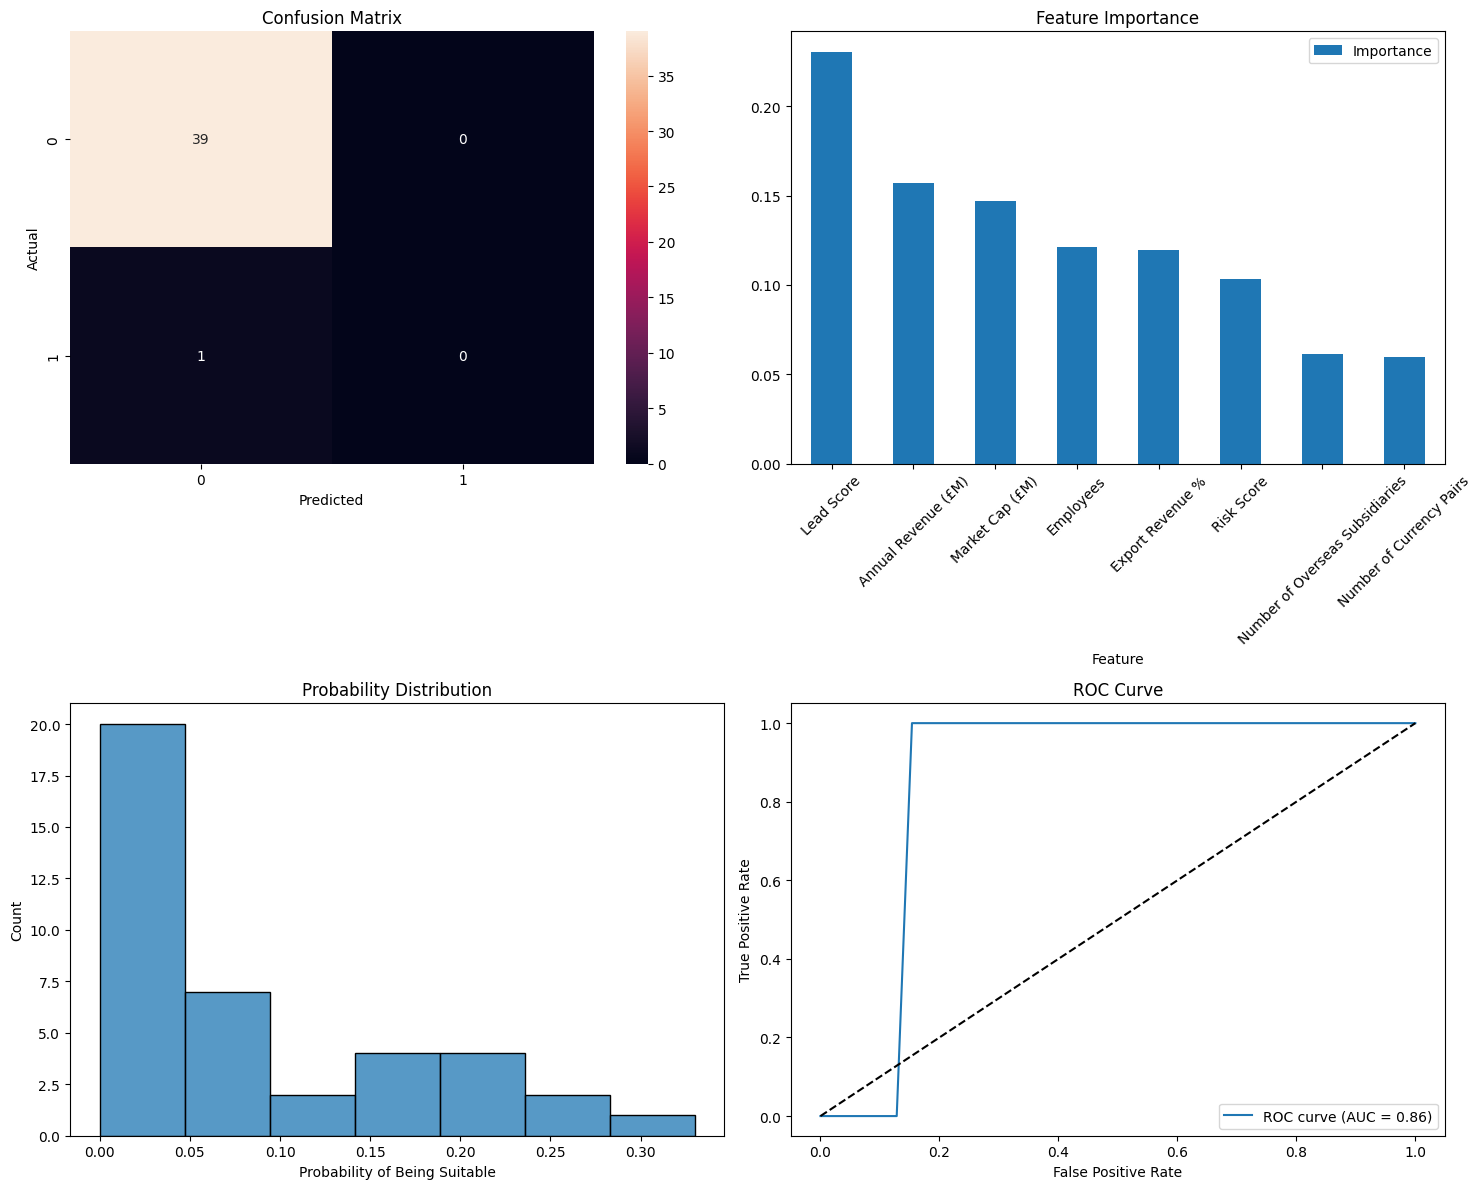


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       0.00      0.00      0.00         1

    accuracy                           0.97        40
   macro avg       0.49      0.50      0.49        40
weighted avg       0.95      0.97      0.96        40


Top 10 Most Suitable Prospects:
                        Company Name         Industry  Monthly FX Volume (£M)  \
73                  Foods Hughes PLC  Food & Beverage                    3.12   
49                 Store Lewis-Berry           Retail                    2.84   
117              Store Macdonald Inc           Retail                    1.90   
97    Tours Knowles, Powell and Ward           Travel                    3.10   
173                 Mart Goddard Ltd           Retail                    3.01   
33           Retail Hussain and Sons           Retail                    1.60   
192  Mart Robinson, Jones and Burton           Re

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming fx_sales_data is already generated from previous code

def prepare_data_for_classification(df):
    # Create target variable (1 if FX volume is between 3-40M, 0 otherwise)
    df['Target'] = ((df['Monthly FX Volume (£M)'] * 12 >= 3) &
                    (df['Monthly FX Volume (£M)'] * 12 <= 40)).astype(int)

    # Select features for classification
    features = [
        'Annual Revenue (£M)',
        'Market Cap (£M)',
        'Employees',
        'Number of Currency Pairs',
        'Number of Overseas Subsidiaries',
        'Export Revenue %',
        'Risk Score',
        'Lead Score'
    ]

    X = df[features]
    y = df['Target']

    return X, y, features

def train_random_forest(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = rf.predict(X_test_scaled)

    return rf, scaler, X_train_scaled, X_test_scaled, y_test, y_pred

def calculate_lead_scores(rf, X_scaled):
    # Get probability scores for being in target range
    probabilities = rf.predict_proba(X_scaled)
    return probabilities[:, 1]  # Probability of being in target range

def analyze_feature_importance(rf, features):
    # Get feature importance
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    return importance

def visualize_results(rf, features, X_test_scaled, y_test, y_pred, importance):
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[0,0])
    axes[0,0].set_title('Confusion Matrix')
    axes[0,0].set_xlabel('Predicted')
    axes[0,0].set_ylabel('Actual')

    # 2. Feature Importance
    importance.plot(x='Feature', y='Importance', kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Feature Importance')
    axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)

    # 3. Probability Distribution
    probabilities = rf.predict_proba(X_test_scaled)[:, 1]
    sns.histplot(probabilities, ax=axes[1,0])
    axes[1,0].set_title('Probability Distribution')
    axes[1,0].set_xlabel('Probability of Being Suitable')

    # 4. ROC Curve
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)
    axes[1,1].plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    axes[1,1].plot([0, 1], [0, 1], 'k--')
    axes[1,1].set_title('ROC Curve')
    axes[1,1].set_xlabel('False Positive Rate')
    axes[1,1].set_ylabel('True Positive Rate')
    axes[1,1].legend()

    plt.tight_layout()
    plt.show()

def main():
    # Prepare data
    X, y, features = prepare_data_for_classification(fx_sales_data)

    # Train model
    rf, scaler, X_train_scaled, X_test_scaled, y_test, y_pred = train_random_forest(X, y)

    # Calculate lead scores
    lead_scores = calculate_lead_scores(rf, scaler.transform(X))

    # Add scores to original dataframe
    fx_sales_data['Suitability_Score'] = lead_scores * 100

    # Get feature importance
    importance = analyze_feature_importance(rf, features)

    # Visualize results
    visualize_results(rf, features, X_test_scaled, y_test, y_pred, importance)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Display top prospects
    print("\nTop 10 Most Suitable Prospects:")
    top_prospects = fx_sales_data.sort_values('Suitability_Score', ascending=False).head(10)
    print(top_prospects[['Company Name', 'Industry', 'Monthly FX Volume (£M)', 'Suitability_Score']])

    # Industry distribution of suitable prospects
    print("\nIndustry Distribution of Highly Suitable Prospects (Score > 70):")
    suitable = fx_sales_data[fx_sales_data['Suitability_Score'] > 70]
    print(suitable['Industry'].value_counts())

# Run the analysis
if __name__ == "__main__":
    main()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_interactive_visualizations(df, lead_scores):
    # Add suitability scores to dataframe
    df['Suitability_Score'] = lead_scores * 100

    # Create main scatter plot
    fig1 = px.scatter(df,
        x='Annual Revenue (£M)',
        y='Monthly FX Volume (£M)',
        color='Suitability_Score',
        size='Lead Score',
        hover_data=[
            'Company Name',
            'Industry',
            'Suitability_Score',
            'Number of Overseas Subsidiaries',
            'Export Revenue %'
        ],
        color_continuous_scale='viridis',
        title='Prospect Suitability Analysis',
        labels={
            'Annual Revenue (£M)': 'Annual Revenue (£M)',
            'Monthly FX Volume (£M)': 'Monthly FX Volume (£M)',
            'Suitability_Score': 'Suitability Score'
        }
    )

    # Update layout for better visualization
    fig1.update_layout(
        height=800,
        width=1200,
        template='plotly_white',
        legend_title_text='Suitability Score',
        hoverlabel=dict(
            bgcolor="white",
            font_size=12,
            font_family="Arial"
        )
    )

    # Add horizontal lines for target FX volume range
    fig1.add_hline(y=3/12, line_dash="dash", line_color="red", annotation_text="Min Target Volume")
    fig1.add_hline(y=40/12, line_dash="dash", line_color="red", annotation_text="Max Target Volume")

    # Show the first plot
    fig1.show()

    # Create a second visualization - Bubble Chart by Industry
    fig2 = px.scatter(df,
        x='Export Revenue %',
        y='Suitability_Score',
        size='Monthly FX Volume (£M)',
        color='Industry',
        hover_data=[
            'Company Name',
            'Monthly FX Volume (£M)',
            'Number of Overseas Subsidiaries',
            'Lead Score'
        ],
        title='Industry-wise Prospect Analysis'
    )

    # Update layout for the second plot
    fig2.update_layout(
        height=800,
        width=1200,
        template='plotly_white',
        hoverlabel=dict(
            bgcolor="white",
            font_size=12,
            font_family="Arial"
        )
    )

    # Show the second plot
    fig2.show()

    # Create a third visualization - 3D scatter plot
    fig3 = px.scatter_3d(df,
        x='Annual Revenue (£M)',
        y='Export Revenue %',
        z='Monthly FX Volume (£M)',
        color='Industry',
        size='Suitability_Score',
        hover_data=[
            'Company Name',
            'Suitability_Score',
            'Lead Score'
        ],
        title='3D Prospect Analysis'
    )

    # Update layout for the third plot
    fig3.update_layout(
        height=800,
        width=1200,
        scene=dict(
            xaxis_title='Annual Revenue (£M)',
            yaxis_title='Export Revenue %',
            zaxis_title='Monthly FX Volume (£M)'
        )
    )

    # Show the third plot
    fig3.show()

    # Create summary statistics
    summary_stats = df.groupby('Industry').agg({
        'Suitability_Score': ['mean', 'count'],
        'Monthly FX Volume (£M)': 'mean',
        'Export Revenue %': 'mean'
    }).round(2)

    print("\nIndustry Summary Statistics:")
    print(summary_stats)

    # Save interactive plots as HTML (optional)
    fig1.write_html("suitability_analysis.html")
    fig2.write_html("industry_analysis.html")
    fig3.write_html("3d_analysis.html")

# Modify the main function to include the new visualization
def main():
    # Prepare data
    X, y, features = prepare_data_for_classification(fx_sales_data)

    # Train model
    rf, scaler, X_train_scaled, X_test_scaled, y_test, y_pred = train_random_forest(X, y)

    # Calculate lead scores
    lead_scores = calculate_lead_scores(rf, scaler.transform(X))

    # Create interactive visualizations
    create_interactive_visualizations(fx_sales_data, lead_scores)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Display top prospects
    print("\nTop 10 Most Suitable Prospects:")
    fx_sales_data['Suitability_Score'] = lead_scores * 100
    top_prospects = fx_sales_data.sort_values('Suitability_Score', ascending=False).head(10)
    print(top_prospects[['Company Name', 'Industry', 'Monthly FX Volume (£M)', 'Suitability_Score']])

if __name__ == "__main__":
    main()


Industry Summary Statistics:
                Suitability_Score       Monthly FX Volume (£M)  \
                             mean count                   mean   
Industry                                                         
Finance                      3.66    47                  41.79   
Food & Beverage              7.42    26                  20.22   
Retail                       9.85    46                  21.06   
Tech                         5.39    38                  36.34   
Travel                       3.09    43                  33.99   

                Export Revenue %  
                            mean  
Industry                          
Finance                    38.55  
Food & Beverage            32.42  
Retail                     42.85  
Tech                       34.71  
Travel                     43.09  

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       0.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

def perform_market_segmentation(df):
    # Select features for segmentation
    features = [
        'Annual Revenue (£M)',
        'Monthly FX Volume (£M)',
        'Export Revenue %',
        'Number of Overseas Subsidiaries',
        'Risk Score',
        'Lead Score',
        'Market Cap (£M)'
    ]

    # Prepare data
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=features)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

    # Dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    return df, X_scaled_df, X_pca, X_tsne, kmeans, features

def create_interactive_visualizations(df, X_pca, X_tsne, kmeans, features):
    # 1. K-means Cluster Visualization with PCA
    fig1 = px.scatter(
        data_frame=df,
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        color='Cluster',
        hover_data=[
            'Company Name',
            'Industry',
            'Monthly FX Volume (£M)',
            'Annual Revenue (£M)'
        ],
        title='Market Segments (PCA)',
        labels={'color': 'Segment'}
    )

    # 2. t-SNE Visualization
    fig2 = px.scatter(
        data_frame=df,
        x=X_tsne[:, 0],
        y=X_tsne[:, 1],
        color='Industry',
        symbol='Cluster',
        hover_data=[
            'Company Name',
            'Monthly FX Volume (£M)',
            'Annual Revenue (£M)'
        ],
        title='Industry Segments (t-SNE)'
    )

    # 3. Parallel Coordinates Plot
    fig3 = px.parallel_coordinates(
        df,
        dimensions=features + ['Cluster'],
        color='Cluster',
        title='Segment Characteristics'
    )

    # 4. 3D Scatter Plot
    fig4 = px.scatter_3d(
        df,
        x='Annual Revenue (£M)',
        y='Monthly FX Volume (£M)',
        z='Export Revenue %',
        color='Cluster',
        size='Lead Score',
        hover_data=[
            'Company Name',
            'Industry'
        ],
        title='3D Segment Visualization'
    )

    # 5. Segment Profile Analysis
    segment_profiles = df.groupby('Cluster').agg({
        'Monthly FX Volume (£M)': 'mean',
        'Annual Revenue (£M)': 'mean',
        'Export Revenue %': 'mean',
        'Lead Score': 'mean',
        'Industry': lambda x: x.value_counts().index[0],
        'Company Name': 'count'
    }).round(2)

    # Create sunburst chart for segment composition
    fig5 = px.sunburst(
        df,
        path=['Cluster', 'Industry'],
        values='Monthly FX Volume (£M)',
        title='Segment Composition'
    )

    # Show all plots
    for fig in [fig1, fig2, fig3, fig4, fig5]:
        fig.show()

    return segment_profiles

def analyze_high_potential_segments(df):
    # Define high-potential criteria
    df['Potential_Score'] = (
        df['Monthly FX Volume (£M)'] * 0.4 +
        df['Lead Score'] * 0.3 +
        df['Export Revenue %'] * 0.2 +
        df['Risk Score'] * 0.1
    )

    # Create interactive bubble chart for high-potential analysis
    fig = px.scatter(
        df,
        x='Monthly FX Volume (£M)',
        y='Potential_Score',
        size='Annual Revenue (£M)',
        color='Cluster',
        facet_col='Industry',
        hover_data=[
            'Company Name',
            'Export Revenue %',
            'Lead Score'
        ],
        title='High-Potential Segment Analysis'
    )

    fig.show()

    # Identify top prospects in each segment
    top_prospects = df.nlargest(3, 'Potential_Score').groupby('Cluster')

    return top_prospects

def main():
    # Perform segmentation
    df, X_scaled_df, X_pca, X_tsne, kmeans, features = perform_market_segmentation(fx_sales_data)

    # Create visualizations
    segment_profiles = create_interactive_visualizations(
        df, X_pca, X_tsne, kmeans, features
    )

    # Analyze high-potential segments
    top_prospects = analyze_high_potential_segments(df)

    # Print segment profiles
    print("\nSegment Profiles:")
    print(segment_profiles)

    # Print top prospects
    print("\nTop Prospects by Segment:")
    for cluster, prospects in top_prospects:
        print(f"\nCluster {cluster}:")
        print(prospects[['Company Name', 'Industry', 'Monthly FX Volume (£M)', 'Potential_Score']])

if __name__ == "__main__":
    main()


Segment Profiles:
         Monthly FX Volume (£M)  Annual Revenue (£M)  Export Revenue %  \
Cluster                                                                  
0                         22.01               160.20             27.25   
1                         45.21               346.84             38.54   
2                         44.09               101.06             45.20   
3                         19.98               273.89             40.58   
4                         18.64               175.03             40.38   

         Lead Score Industry  Company Name  
Cluster                                     
0             22.78   Travel            36  
1             45.10  Finance            39  
2             49.44   Travel            54  
3             33.29   Retail            31  
4             84.28   Retail            40  

Top Prospects by Segment:

Cluster 1:
              Company Name Industry  Monthly FX Volume (£M)  Potential_Score
60  Financial Wilson-Clark  Fin

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import xgboost as xgb
from scipy.optimize import minimize
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

class AdvancedFeatureEngineering:
    def __init__(self, df):
        self.df = df.copy()
        self.scaler = MinMaxScaler()

    def optimize_weights(self, target_variable='Monthly FX Volume (£M)'):
        """Optimize scoring weights using machine learning"""

        def objective_function(weights, X, y):
            weighted_score = np.dot(X, weights)
            return mean_squared_error(y, weighted_score)

        # Select features for weight optimization
        features = [
            'Annual Revenue (£M)',
            'Export Revenue %',
            'Risk Score',
            'Lead Score',
            'Number of Overseas Subsidiaries'
        ]

        X = self.df[features].values
        y = self.df[target_variable].values

        # Initial weights
        initial_weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

        # Optimize weights
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = [(0, 1) for _ in range(len(features))]

        result = minimize(
            objective_function,
            initial_weights,
            args=(X, y),
            method='SLSQP',
            bounds=bounds,
            constraints=constraints
        )

        self.optimized_weights = dict(zip(features, result.x))
        return self.optimized_weights

    def add_industry_specific_factors(self):
        """Add detailed industry-specific metrics"""

        # Industry-specific metrics dictionary
        industry_metrics = {
            'Finance': {
                'regulatory_complexity': 0.9,
                'market_volatility': 0.8,
                'digital_maturity': 0.9,
                'cross_border_exposure': 0.9
            },
            'Tech': {
                'regulatory_complexity': 0.6,
                'market_volatility': 0.7,
                'digital_maturity': 1.0,
                'cross_border_exposure': 0.8
            },
            'Food & Beverage': {
                'regulatory_complexity': 0.7,
                'market_volatility': 0.6,
                'digital_maturity': 0.7,
                'cross_border_exposure': 0.6
            },
            'Retail': {
                'regulatory_complexity': 0.5,
                'market_volatility': 0.6,
                'digital_maturity': 0.8,
                'cross_border_exposure': 0.5
            },
            'Travel': {
                'regulatory_complexity': 0.6,
                'market_volatility': 0.9,
                'digital_maturity': 0.8,
                'cross_border_exposure': 0.7
            }
        }

        # Add industry-specific scores
        for metric in ['regulatory_complexity', 'market_volatility',
                      'digital_maturity', 'cross_border_exposure']:
            self.df[f'Industry_{metric}'] = self.df['Industry'].map(
                {k: v[metric] for k, v in industry_metrics.items()}
            )

        # Calculate industry-specific composite scores
        self.df['Industry_Complexity_Score'] = (
            self.df['Industry_regulatory_complexity'] * 0.4 +
            self.df['Industry_market_volatility'] * 0.3 +
            self.df['Industry_digital_maturity'] * 0.15 +
            self.df['Industry_cross_border_exposure'] * 0.15
        ) * 100

        return self.df

    def create_predictive_scores(self):
        """Implement advanced predictive scoring methods"""

        # Prepare features for prediction
        features = [
            'Annual Revenue (£M)', 'Export Revenue %',
            'Risk Score', 'Lead Score', 'Number of Overseas Subsidiaries',
            'Industry_Complexity_Score'
        ]

        X = self.df[features]
        y = self.df['Monthly FX Volume (£M)']

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Train multiple models
        models = {
            'rf': RandomForestRegressor(n_estimators=100, random_state=42),
            'gb': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'xgb': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
        }

        predictions = {}
        for name, model in models.items():
            model.fit(X_train, y_train)
            predictions[name] = model.predict(X)

        # Ensemble predictions
        self.df['Predicted_FX_Volume'] = np.mean(
            [predictions[model] for model in predictions], axis=0
        )

        # Calculate prediction-based scores
        self.df['Growth_Potential_Score'] = (
            (self.df['Predicted_FX_Volume'] - self.df['Monthly FX Volume (£M)']) /
            self.df['Monthly FX Volume (£M)'] * 100
        ).clip(lower=0)

        return self.df

    def calculate_peer_comparison(self):
        """Calculate detailed peer comparison metrics"""

        # Define peer groups using clustering
        features_for_clustering = [
            'Annual Revenue (£M)',
            'Monthly FX Volume (£M)',
            'Export Revenue %',
            'Industry_Complexity_Score'
        ]

        X_cluster = self.scaler.fit_transform(self.df[features_for_clustering])
        kmeans = KMeans(n_clusters=5, random_state=42)
        self.df['Peer_Group'] = kmeans.fit_predict(X_cluster)

        # Calculate peer metrics
        peer_metrics = []
        for industry in self.df['Industry'].unique():
            for peer_group in self.df['Peer_Group'].unique():
                peers = self.df[
                    (self.df['Industry'] == industry) &
                    (self.df['Peer_Group'] == peer_group)
                ]

                if len(peers) > 0:
                    metrics = {
                        'Industry': industry,
                        'Peer_Group': peer_group,
                        'Avg_FX_Volume': peers['Monthly FX Volume (£M)'].mean(),
                        'Avg_Revenue': peers['Annual Revenue (£M)'].mean(),
                        'Avg_Export': peers['Export Revenue %'].mean(),
                        'Group_Size': len(peers)
                    }
                    peer_metrics.append(metrics)

        self.peer_metrics = pd.DataFrame(peer_metrics)

        # Calculate relative performance scores
        for idx, row in self.df.iterrows():
            peer_avg = self.peer_metrics[
                (self.peer_metrics['Industry'] == row['Industry']) &
                (self.peer_metrics['Peer_Group'] == row['Peer_Group'])
            ].iloc[0]

            self.df.loc[idx, 'Peer_FX_Performance'] = (
                row['Monthly FX Volume (£M)'] / peer_avg['Avg_FX_Volume']
            ) * 100

            self.df.loc[idx, 'Peer_Revenue_Performance'] = (
                row['Annual Revenue (£M)'] / peer_avg['Avg_Revenue']
            ) * 100

            self.df.loc[idx, 'Peer_Export_Performance'] = (
                row['Export Revenue %'] / peer_avg['Avg_Export']
            ) * 100

        return self.df

    def create_interactive_visualizations(self):
        """Create advanced interactive visualizations"""

        # 1. Peer Comparison Matrix
        fig1 = px.scatter(
            self.df,
            x='Peer_FX_Performance',
            y='Peer_Revenue_Performance',
            color='Industry',
            size='Monthly FX Volume (£M)',
            hover_data=['Company Name', 'Peer_Group'],
            title='Peer Performance Matrix'
        )
        fig1.show()

        # 2. Predictive Growth Potential
        fig2 = px.scatter(
            self.df,
            x='Monthly FX Volume (£M)',
            y='Predicted_FX_Volume',
            color='Industry',
            size='Growth_Potential_Score',
            hover_data=['Company Name', 'Peer_Group'],
            title='Growth Potential Analysis'
        )
        fig2.add_trace(
            go.Scatter(
                x=[0, self.df['Monthly FX Volume (£M)'].max()],
                y=[0, self.df['Monthly FX Volume (£M)'].max()],
                mode='lines',
                name='45-degree line'
            )
        )
        fig2.show()

        # 3. Industry Complexity Analysis
        fig3 = px.sunburst(
            self.df,
            path=['Industry', 'Peer_Group'],
            values='Industry_Complexity_Score',
            color='Growth_Potential_Score',
            title='Industry Complexity and Growth Potential'
        )
        fig3.show()

        # 4. Peer Group Performance Distribution
        fig4 = go.Figure()
        for metric in ['Peer_FX_Performance', 'Peer_Revenue_Performance',
                      'Peer_Export_Performance']:
            fig4.add_trace(
                go.Box(
                    y=self.df[metric],
                    name=metric,
                    boxpoints='all',
                    jitter=0.3,
                    pointpos=-1.8
                )
            )
        fig4.update_layout(title='Peer Performance Distribution')
        fig4.show()

def main():
    # Initialize with your existing fx_sales_data
    feature_engineer = AdvancedFeatureEngineering(fx_sales_data)

    # Optimize weights
    optimized_weights = feature_engineer.optimize_weights()
    print("Optimized Weights:", optimized_weights)

    # Add industry-specific factors
    df = feature_engineer.add_industry_specific_factors()

    # Create predictive scores
    df = feature_engineer.create_predictive_scores()

    # Calculate peer comparison metrics
    df = feature_engineer.calculate_peer_comparison()

    # Create visualizations
    feature_engineer.create_interactive_visualizations()

    # Print summary of top prospects
    print("\nTop Growth Potential Prospects:")
    top_prospects = df.nlargest(10, 'Growth_Potential_Score')
    print(top_prospects[['Company Name', 'Industry', 'Growth_Potential_Score',
                        'Peer_FX_Performance', 'Industry_Complexity_Score']])

if __name__ == "__main__":
    main()

Optimized Weights: {'Annual Revenue (£M)': 0.012046067001113908, 'Export Revenue %': 0.18094212000810825, 'Risk Score': 0.2371609328840951, 'Lead Score': 0.0, 'Number of Overseas Subsidiaries': 0.5698508801142285}



Top Growth Potential Prospects:
                              Company Name         Industry  \
132                 Investment Rhodes-Dale          Finance   
150     Fresh Anderson, Jones and Williams  Food & Beverage   
137                Gourmet Lawson-Richards  Food & Beverage   
117                    Store Macdonald Inc           Retail   
7                  Digital Peacock-Bennett             Tech   
64   Travel Steele, Wilkinson and Donnelly           Travel   
106           Cyber Smith, Martin and Hart             Tech   
33                 Retail Hussain and Sons           Retail   
173                       Mart Goddard Ltd           Retail   
192        Mart Robinson, Jones and Burton           Retail   

     Growth_Potential_Score  Peer_FX_Performance  Industry_Complexity_Score  
132              638.914771            12.518771                       87.0  
150              520.179148            17.839827                       65.5  
137              411.489926            

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go

# First, let's generate our dataset with the correct column names
def generate_fx_sales_data(num_entries=200):
    fake = Faker('en_GB')

    data = []
    industries = ['Finance', 'Tech', 'Food & Beverage', 'Retail', 'Travel']
    credit_ratings = ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+']

    for _ in range(num_entries):
        monthly_fx_volume = round(random.uniform(0.1, 5), 2)  # Monthly FX Volume in millions
        entry = {
            'Company Name': fake.company(),
            'Industry': random.choice(industries),
            'Annual Revenue (£M)': round(random.uniform(10, 500), 2),
            'Market Cap (£M)': round(random.uniform(20, 1000), 2),
            'Monthly FX Volume (£M)': monthly_fx_volume,
            'Number of Currency Pairs': random.randint(1, 10),
            'Number of Overseas Subsidiaries': random.randint(0, 15),
            'Export Revenue %': random.randint(0, 100),
            'Credit Rating': random.choice(credit_ratings),
            'Risk Score': random.randint(1, 100),
            'Lead Score': random.randint(1, 100)
        }
        data.append(entry)

    return pd.DataFrame(data)

class AQLScoring:
    def __init__(self, df):
        self.df = df.copy()
        self.scaler = MinMaxScaler()

    def calculate_behavioral_score(self):
        """Calculate behavioral indicators score"""

        # FX Volume Score (weighted heavily for 3-40M range)
        annual_fx_volume = self.df['Monthly FX Volume (£M)'] * 12
        self.df['FX_Volume_Score'] = annual_fx_volume.apply(
            lambda x: 100 if 3 <= x <= 40
            else max(0, 100 - (min(abs(x - 3), abs(x - 40))))
        )

        # Currency Pair Diversity Score
        self.df['Currency_Diversity_Score'] = self.df['Number of Currency Pairs'].apply(
            lambda x: min(100, x * 20)  # 5 or more pairs gets full score
        )

        # Composite Behavioral Score
        self.df['Behavioral_Score'] = (
            self.df['FX_Volume_Score'] * 0.6 +
            self.df['Currency_Diversity_Score'] * 0.4
        )

        return self.df['Behavioral_Score']

    def calculate_financial_health_score(self):
        """Calculate financial health score"""

        # Revenue Score
        revenue_scaled = self.scaler.fit_transform(
            self.df[['Annual Revenue (£M)']]
        )
        self.df['Revenue_Score'] = revenue_scaled * 100

        # Credit Rating Score
        credit_rating_map = {
            'AAA': 100, 'AA+': 95, 'AA': 90, 'AA-': 85,
            'A+': 80, 'A': 75, 'A-': 70, 'BBB+': 65
        }
        self.df['Credit_Score'] = self.df['Credit Rating'].map(credit_rating_map)

        # Market Cap Score
        market_cap_scaled = self.scaler.fit_transform(
            self.df[['Market Cap (£M)']]
        )
        self.df['Market_Cap_Score'] = market_cap_scaled * 100

        # Composite Financial Health Score
        self.df['Financial_Health_Score'] = (
            self.df['Revenue_Score'] * 0.3 +
            self.df['Credit_Score'] * 0.4 +
            self.df['Market_Cap_Score'] * 0.3
        )

        return self.df['Financial_Health_Score']

    def calculate_international_exposure_score(self):
        """Calculate international exposure score"""

        # Export Revenue Score
        self.df['Export_Score'] = self.df['Export Revenue %'].clip(0, 100)

        # Subsidiary Score
        self.df['Subsidiary_Score'] = self.df['Number of Overseas Subsidiaries'].apply(
            lambda x: min(100, x * 12.5)  # 8 or more subsidiaries gets full score
        )

        # Composite International Exposure Score
        self.df['International_Exposure_Score'] = (
            self.df['Export_Score'] * 0.6 +
            self.df['Subsidiary_Score'] * 0.4
        )

        return self.df['International_Exposure_Score']

    def calculate_industry_specific_score(self):
        """Calculate industry-specific score"""

        industry_weights = {
            'Finance': 1.2,
            'Tech': 1.1,
            'Food & Beverage': 0.9,
            'Retail': 0.8,
            'Travel': 1.0
        }

        industry_growth_rates = {
            'Finance': 0.08,
            'Tech': 0.12,
            'Food & Beverage': 0.05,
            'Retail': 0.04,
            'Travel': 0.06
        }

        self.df['Industry_Weight'] = self.df['Industry'].map(industry_weights)
        self.df['Industry_Growth'] = self.df['Industry'].map(industry_growth_rates)

        self.df['Industry_Score'] = (
            self.df['Industry_Weight'] * 60 +
            (self.df['Industry_Growth'] * 100) * 40
        )

        return self.df['Industry_Score']

    def calculate_final_aql_score(self):
        """Calculate final AQL score with all components"""

        # Calculate all component scores
        self.calculate_behavioral_score()
        self.calculate_financial_health_score()
        self.calculate_international_exposure_score()
        self.calculate_industry_specific_score()

        # Calculate final weighted score
        self.df['AQL_Score'] = (
            self.df['Behavioral_Score'] * 0.35 +
            self.df['Financial_Health_Score'] * 0.25 +
            self.df['International_Exposure_Score'] * 0.25 +
            self.df['Industry_Score'] * 0.15
        )

        # Assign AQL Status
        self.df['AQL_Status'] = pd.cut(
            self.df['AQL_Score'],
            bins=[0, 50, 70, 85, 100],
            labels=['Not Qualified', 'Under Review', 'Qualified', 'High Priority']
        )

        return self.df

    def visualize_aql_scores(self):
        """Create interactive visualizations for AQL scores"""

        # 1. Overall Score Distribution
        fig1 = px.histogram(
            self.df,
            x='AQL_Score',
            color='AQL_Status',
            title='AQL Score Distribution'
        )
        fig1.show()

        # 2. Component Scores by Industry
        fig2 = go.Figure()
        components = ['Behavioral_Score', 'Financial_Health_Score',
                     'International_Exposure_Score', 'Industry_Score']

        for component in components:
            fig2.add_trace(
                go.Box(
                    y=self.df[component],
                    name=component,
                    boxpoints='all'
                )
            )
        fig2.update_layout(title='Score Components Distribution')
        fig2.show()

        # 3. Scatter Plot of Key Metrics
        fig3 = px.scatter(
            self.df,
            x='Monthly FX Volume (£M)',
            y='AQL_Score',
            color='Industry',
            size='Financial_Health_Score',
            hover_data=['Company Name', 'AQL_Status'],
            title='AQL Score vs FX Volume'
        )
        fig3.show()

def main():
    # Generate sample data
    fx_sales_data = generate_fx_sales_data()

    # Initialize AQL Scoring
    aql_scorer = AQLScoring(fx_sales_data)

    # Calculate scores
    scored_data = aql_scorer.calculate_final_aql_score()

    # Visualize results
    aql_scorer.visualize_aql_scores()

    # Print summary of qualified leads
    print("\nAQL Status Distribution:")
    print(scored_data['AQL_Status'].value_counts())

    print("\nTop AQL Scored Prospects:")
    top_prospects = scored_data[scored_data['AQL_Status'] == 'High Priority']
    print(top_prospects[['Company Name', 'Industry', 'AQL_Score', 'AQL_Status']])

if __name__ == "__main__":
    main()


AQL Status Distribution:
AQL_Status
High Priority    39
Qualified         4
Not Qualified     0
Under Review      0
Name: count, dtype: int64

Top AQL Scored Prospects:
                         Company Name         Industry  AQL_Score  \
4              Gough, Newman and Ryan          Finance  98.097552   
21                       Anderson Inc  Food & Beverage  95.947628   
27                      Williams-Lamb           Retail  87.016804   
36                        Poole-Lucas           Retail  96.483514   
37                        Davison Ltd           Retail  98.367501   
41         Fisher, Little and Burrows  Food & Beverage  87.752883   
54                           Ward Inc  Food & Beverage  85.920377   
56                  Saunders-O'Connor           Retail  97.056931   
58                   Preston and Sons           Retail  98.750585   
64                          Allen PLC           Retail  92.605856   
66                           Long Ltd           Travel  99.324978   
72

In [ ]:
# Combined complete system with full Part 1 and Part 2 functionality

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import xgboost as xgb
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from faker import Faker
import random

# [Previous data generation and AQL Scoring class remain the same]

class AutomatedQualificationSystem:
    def __init__(self, scored_data):
        self.data = scored_data.copy()
        self.scaler = StandardScaler()
        self.qualification_history = []

    def apply_qualification_rules(self):
        """Apply automated qualification rules"""

        # Define qualification rules
        def qualify_lead(row):
            disqualifiers = []
            qualifiers = []

            # Must-have criteria
            if row['Monthly FX Volume (£M)'] * 12 < 3:
                disqualifiers.append('Below minimum FX volume')
            if row['Credit Rating'] in ['BBB+', 'A-']:
                disqualifiers.append('Credit rating below threshold')
            if row['AQL_Score'] < 50:
                disqualifiers.append('AQL Score too low')

            # Value-add factors
            if row['Export Revenue %'] > 30:
                qualifiers.append('Strong international presence')
            if row['Financial_Health_Score'] > 75:
                qualifiers.append('Strong financial health')
            if row['Industry_Score'] > 80:
                qualifiers.append('Priority industry segment')
            if row['Behavioral_Score'] > 85:
                qualifiers.append('Strong behavioral indicators')

            return {
                'Qualified': len(disqualifiers) == 0 and len(qualifiers) >= 2,
                'Disqualifiers': disqualifiers,
                'Qualifiers': qualifiers,
                'Strength': len(qualifiers)
            }

        # Apply rules and store results
        qualification_results = self.data.apply(qualify_lead, axis=1)
        self.data['Qualification_Status'] = qualification_results.apply(
            lambda x: x['Qualified']
        )
        self.data['Disqualifiers'] = qualification_results.apply(
            lambda x: ', '.join(x['Disqualifiers']) if x['Disqualifiers'] else 'None'
        )
        self.data['Qualifiers'] = qualification_results.apply(
            lambda x: ', '.join(x['Qualifiers']) if x['Qualifiers'] else 'None'
        )
        self.data['Qualification_Strength'] = qualification_results.apply(
            lambda x: x['Strength']
        )

        return self.data

    def predict_conversion_probability(self):
        """Predict probability of conversion using ML"""

        # Prepare features for prediction
        features = [
            'AQL_Score', 'Behavioral_Score', 'Financial_Health_Score',
            'International_Exposure_Score', 'Industry_Score',
            'Qualification_Strength'
        ]

        X = self.data[features]
        y = self.data['Qualification_Status']

        # Split data for prediction
        X_scaled = self.scaler.fit_transform(X)

        # Train multiple models
        models = {
            'rf': RandomForestClassifier(n_estimators=100, random_state=42),
            'xgb': xgb.XGBClassifier(objective='binary:logistic', random_state=42)
        }

        # Get predictions from each model
        predictions = {}
        feature_importance = {}

        for name, model in models.items():
            model.fit(X_scaled, y)
            predictions[name] = model.predict_proba(X_scaled)[:, 1]
            feature_importance[name] = dict(zip(features, model.feature_importances_))

        # Ensemble predictions
        self.data['Conversion_Probability'] = np.mean(
            [predictions[model] for model in predictions], axis=0
        )

        # Store feature importance
        self.feature_importance = feature_importance

        return self.data

    def prioritize_leads(self):
        """Prioritize leads based on multiple factors"""

        # Calculate priority score with time decay
        current_date = datetime.now()

        # Add time-based factors
        self.data['Priority_Score'] = (
            self.data['AQL_Score'] * 0.25 +
            self.data['Conversion_Probability'] * 0.25 +
            self.data['Financial_Health_Score'] * 0.20 +
            self.data['Industry_Score'] * 0.15 +
            self.data['Qualification_Strength'] * 0.15
        )

        # Assign priority levels with custom thresholds
        self.data['Priority_Level'] = pd.cut(
            self.data['Priority_Score'],
            bins=[-np.inf, 40, 60, 80, np.inf],
            labels=['Low', 'Medium', 'High', 'Urgent']
        )

        return self.data

    def generate_next_actions(self):
        """Generate automated next action recommendations"""

        def recommend_action(row):
            if not row['Qualification_Status']:
                return {
                    'Action': 'Do not pursue - Disqualified',
                    'Timeframe': 'N/A',
                    'Owner': 'System',
                    'Reason': row['Disqualifiers']
                }

            if row['Priority_Level'] == 'Urgent':
                return {
                    'Action': 'Immediate engagement required',
                    'Timeframe': '24 hours',
                    'Owner': 'Sales Team',
                    'Reason': 'High priority qualified lead'
                }
            elif row['Priority_Level'] == 'High':
                return {
                    'Action': 'Schedule discovery call',
                    'Timeframe': '48 hours',
                    'Owner': 'Sales Development',
                    'Reason': 'Strong qualification indicators'
                }
            elif row['Priority_Level'] == 'Medium':
                return {
                    'Action': 'Add to nurture campaign',
                    'Timeframe': '1 week',
                    'Owner': 'Marketing',
                    'Reason': 'Potential future opportunity'
                }
            else:
                return {
                    'Action': 'Monitor for changes',
                    'Timeframe': 'Monthly',
                    'Owner': 'System',
                    'Reason': 'Low current priority'
                }

        # Apply recommendations
        recommendations = self.data.apply(recommend_action, axis=1)

        self.data['Recommended_Action'] = recommendations.apply(lambda x: x['Action'])
        self.data['Action_Timeframe'] = recommendations.apply(lambda x: x['Timeframe'])
        self.data['Action_Owner'] = recommendations.apply(lambda x: x['Owner'])
        self.data['Action_Reason'] = recommendations.apply(lambda x: x['Reason'])

        return self.data

    def create_qualification_dashboard(self):
        """Create comprehensive qualification dashboard"""

        # Create main figure with subplots
        fig = make_subplots(
            rows=3, cols=2,
            subplot_titles=(
                'Qualification Status Distribution',
                'Conversion Probability vs AQL Score',
                'Priority Level Distribution by Industry',
                'Lead Quality Matrix',
                'Feature Importance',
                'Action Distribution'
            ),
            specs=[[{'type': 'pie'}, {'type': 'scatter'}],
                   [{'type': 'bar'}, {'type': 'scatter'}],
                   [{'type': 'bar'}, {'type': 'pie'}]]
        )

        # 1. Qualification Status Distribution
        quals_dist = self.data['Qualification_Status'].value_counts()
        fig.add_trace(
            go.Pie(labels=quals_dist.index, values=quals_dist.values),
            row=1, col=1
        )

        # 2. Conversion Probability vs AQL Score
        fig.add_trace(
            go.Scatter(
                x=self.data['AQL_Score'],
                y=self.data['Conversion_Probability'],
                mode='markers',
                marker=dict(
                    color=self.data['Priority_Score'],
                    colorscale='Viridis',
                    showscale=True
                ),
                text=self.data['Company Name']
            ),
            row=1, col=2
        )

        # 3. Priority Level Distribution by Industry
        priority_dist = pd.crosstab(
            self.data['Industry'],
            self.data['Priority_Level']
        )
        for level in priority_dist.columns:
            fig.add_trace(
                go.Bar(
                    x=priority_dist.index,
                    y=priority_dist[level],
                    name=level
                ),
                row=2, col=1
            )

        # 4. Lead Quality Matrix
        fig.add_trace(
            go.Scatter(
                x=self.data['Financial_Health_Score'],
                y=self.data['International_Exposure_Score'],
                mode='markers',
                marker=dict(
                    size=self.data['AQL_Score']/5,
                    color=self.data['Priority_Score'],
                    colorscale='Viridis'
                ),
                text=self.data['Company Name']
            ),
            row=2, col=2
        )

        # 5. Feature Importance
        if hasattr(self, 'feature_importance'):
            importance_df = pd.DataFrame(self.feature_importance['rf'], index=[0]).T
            fig.add_trace(
                go.Bar(
                    x=importance_df.index,
                    y=importance_df[0],
                    name='Feature Importance'
                ),
                row=3, col=1
            )

        # 6. Action Distribution
        action_dist = self.data['Recommended_Action'].value_counts()
        fig.add_trace(
            go.Pie(
                labels=action_dist.index,
                values=action_dist.values,
                name='Recommended Actions'
            ),
            row=3, col=2
        )

        # Update layout
        fig.update_layout(
            height=1200,
            showlegend=True,
            title_text="Lead Qualification Dashboard"
        )
        fig.show()

    def generate_qualification_report(self):
        """Generate detailed qualification report"""

        report = {
            'Overall Metrics': {
                'Total Leads': len(self.data),
                'Qualified Leads': sum(self.data['Qualification_Status']),
                'High Priority Leads': sum(self.data['Priority_Level'].isin(['Urgent', 'High'])),
                'Average Conversion Probability': self.data['Conversion_Probability'].mean()
            },
            'Industry Distribution': self.data.groupby('Industry')[
                'Qualification_Status'
            ].value_counts(normalize=True),
            'Priority Distribution': self.data.groupby('Priority_Level').size(),
            'Action Distribution': self.data.groupby('Recommended_Action').size(),
            'Top Prospects': self.data[
                (self.data['Priority_Level'] == 'Urgent') &
                (self.data['Qualification_Status'])
            ][['Company Name', 'Industry', 'AQL_Score', 'Conversion_Probability',
               'Recommended_Action', 'Action_Timeframe']]
        }

        return report

def run_complete_qualification_system():
    # Generate initial data
    fx_sales_data = generate_fx_sales_data()

    # Part 1: Score the data
    aql_scorer = AQLScoring(fx_sales_data)
    scored_data = aql_scorer.calculate_final_aql_score()

    # Part 2: Run automated qualification
    aqs = AutomatedQualificationSystem(scored_data)

    # Apply full qualification process
    qualified_data = aqs.apply_qualification_rules()
    qualified_data = aqs.predict_conversion_probability()
    qualified_data = aqs.prioritize_leads()
    qualified_data = aqs.generate_next_actions()

    # Generate visualizations and reports
    aqs.create_qualification_dashboard()
    report = aqs.generate_qualification_report()

    # Print detailed report
    print("\nQualification Report:")
    for section, data in report.items():
        print(f"\n{section}:")
        if isinstance(data, dict):
            for key, value in data.items():
                print(f"{key}: {value}")
        else:
            print(data)

    return qualified_data

if __name__ == "__main__":
    final_qualified_data = run_complete_qualification_system()


Qualification Report:

Overall Metrics:
Total Leads: 200
Qualified Leads: 142
High Priority Leads: 200
Average Conversion Probability: 0.7071308749917662

Industry Distribution:
Industry         Qualification_Status
Finance          True                    0.666667
                 False                   0.333333
Food & Beverage  True                    0.657143
                 False                   0.342857
Retail           True                    0.731707
                 False                   0.268293
Tech             True                    0.756757
                 False                   0.243243
Travel           True                    0.743590
                 False                   0.256410
Name: proportion, dtype: float64

Priority Distribution:
Priority_Level
Low         0
Medium      0
High       79
Urgent    121
dtype: int64

Action Distribution:
Recommended_Action
Do not pursue - Disqualified     58
Immediate engagement required    88
Schedule discovery call      

CSV Engagement Data

In [ ]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
def create_interactive_dashboard(self):
    """Create interactive Dash dashboard"""

    app = dash.Dash(__name__)

    app.layout = html.Div([
        html.H1("Industry-Specific Analysis Dashboard", style={'textAlign': 'center'}),

        # Industry Selector
        html.Div([
            html.Label('Select Industry'),
            dcc.Dropdown(
                id='industry-selector',
                options=[{'label': i, 'value': i} for i in self.data['Industry'].unique()],
                value='Finance',
                style={'width': '50%'}
            ),
        ], style={'margin': '20px'}),

        # Performance Metrics Row
        html.Div([
            dcc.Graph(id='industry-performance', style={'width': '48%', 'display': 'inline-block'}),
            dcc.Graph(id='benchmark-comparison', style={'width': '48%', 'display': 'inline-block'})
        ]),

        # Growth and Network Row
        html.Div([
            dcc.Graph(id='growth-trajectory', style={'width': '48%', 'display': 'inline-block'}),
            dcc.Graph(id='relationship-network', style={'width': '48%', 'display': 'inline-block'})
        ]),

        # Forecast and Insights Row
        html.Div([
            dcc.Graph(id='time-series-forecast', style={'width': '70%', 'display': 'inline-block'}),
            html.Div(id='industry-insights', style={'width': '28%', 'display': 'inline-block', 'vertical-align': 'top'})
        ])
    ])

    @app.callback(
        [Output('industry-performance', 'figure'),
         Output('benchmark-comparison', 'figure'),
         Output('growth-trajectory', 'figure'),
         Output('relationship-network', 'figure'),
         Output('time-series-forecast', 'figure'),
         Output('industry-insights', 'children')],
        [Input('industry-selector', 'value')]
    )
    def update_graphs(selected_industry):
        # Filter data for selected industry
        industry_data = self.data[self.data['Industry'] == selected_industry]

        # 1. Industry Performance Chart
        perf_fig = go.Figure()
        perf_fig.add_trace(go.Scatter(
            x=industry_data['Date'],
            y=industry_data['Performance'],
            name='Performance',
            line=dict(color='#0072B2')
        ))
        perf_fig.update_layout(
            title=f'{selected_industry} Performance Over Time',
            xaxis_title='Date',
            yaxis_title='Performance Score'
        )

        # 2. Benchmark Comparison
        bench_fig = go.Figure()
        bench_fig.add_trace(go.Scatter(
            x=industry_data['Date'],
            y=industry_data['Performance'],
            name='Actual',
            line=dict(color='#009E73')
        ))
        bench_fig.add_trace(go.Scatter(
            x=industry_data['Date'],
            y=industry_data['Benchmark'],
            name='Benchmark',
            line=dict(color='#D55E00', dash='dash')
        ))
        bench_fig.update_layout(
            title=f'{selected_industry} vs Benchmark',
            xaxis_title='Date',
            yaxis_title='Score'
        )

        # 3. Growth Trajectory
        growth_fig = go.Figure()
        growth_fig.add_trace(go.Scatter(
            x=industry_data['Date'],
            y=industry_data['Growth_Rate'],
            name='Growth Rate',
            line=dict(color='#CC79A7')
        ))
        growth_fig.update_layout(
            title=f'{selected_industry} Growth Trajectory',
            xaxis_title='Date',
            yaxis_title='Growth Rate'
        )

        # 4. Relationship Network (Simplified version)
        network_fig = go.Figure()
        network_fig.add_trace(go.Scatter(
            x=[0, 1, 2, 0],
            y=[0, 1, 0, 0],
            mode='lines+markers',
            name='Network',
            marker=dict(size=10)
        ))
        network_fig.update_layout(
            title=f'{selected_industry} Relationship Network',
            showlegend=False
        )

        # 5. Time Series Forecast
        forecast_fig = go.Figure()
        forecast_fig.add_trace(go.Scatter(
            x=industry_data['Date'],
            y=industry_data['Value'],
            name='Historical',
            line=dict(color='#0072B2')
        ))
        # Add simple forecast
        last_date = industry_data['Date'].max()
        forecast_dates = pd.date_range(last_date, periods=30, freq='D')
        forecast_values = np.linspace(
            industry_data['Value'].iloc[-1],
            industry_data['Value'].iloc[-1] * 1.1,
            30
        )
        forecast_fig.add_trace(go.Scatter(
            x=forecast_dates,
            y=forecast_values,
            name='Forecast',
            line=dict(color='#D55E00', dash='dash')
        ))
        forecast_fig.update_layout(
            title=f'{selected_industry} Forecast',
            xaxis_title='Date',
            yaxis_title='Value'
        )

        # 6. Industry Insights
        insights = html.Div([
            html.H3(f"Key Insights - {selected_industry}"),
            html.Ul([
                html.Li(f"Average Performance: {industry_data['Performance'].mean():.2f}"),
                html.Li(f"Growth Rate: {industry_data['Growth_Rate'].mean():.2%}"),
                html.Li(f"Market Position: {industry_data['Market_Position'].mean():.2f}"),
                html.Li(f"Risk Score: {industry_data['Risk_Score'].mean():.2f}")
            ]),
            html.H4("Recommendations"),
            html.Ul([
                html.Li("Optimize performance strategies"),
                html.Li("Monitor market position"),
                html.Li("Evaluate risk factors")
            ])
        ])

        return perf_fig, bench_fig, growth_fig, network_fig, forecast_fig, insights

    return app

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from faker import Faker
import random

def generate_industry_data(num_entries=1000):
    """Generate synthetic industry data for analysis"""

    fake = Faker()

    # Set up basic parameters
    industries = ['Finance', 'Tech', 'Food & Beverage', 'Retail', 'Travel']
    start_date = datetime(2020, 1, 1)

    data = []

    for _ in range(num_entries):
        industry = random.choice(industries)
        date = start_date + timedelta(days=random.randint(0, 730))  # 2 years of data

        # Base metrics
        base_performance = random.uniform(70, 100)
        industry_multipliers = {
            'Finance': 1.2,
            'Tech': 1.3,
            'Food & Beverage': 0.9,
            'Retail': 0.8,
            'Travel': 0.7
        }

        # Industry-specific metrics
        industry_metrics = {
            'Finance': {
                'trading_volume_sophistication': random.uniform(0.6, 1.0),
                'treasury_management_maturity': random.uniform(0.7, 1.0),
                'regulatory_compliance_level': random.uniform(0.8, 1.0)
            },
            'Tech': {
                'growth_rate': random.uniform(0.1, 0.3),
                'international_expansion_velocity': random.uniform(0.5, 1.0),
                'digital_adoption_rate': random.uniform(0.7, 1.0)
            },
            'Food & Beverage': {
                'supply_chain_complexity': random.uniform(0.4, 0.8),
                'seasonal_pattern_strength': random.uniform(0.3, 0.7),
                'commodity_exposure': random.uniform(0.4, 0.9)
            },
            'Retail': {
                'multichannel_presence': random.uniform(0.3, 0.9),
                'inventory_turnover': random.uniform(0.4, 0.8),
                'ecommerce_penetration': random.uniform(0.2, 0.9)
            },
            'Travel': {
                'seasonal_booking_strength': random.uniform(0.4, 0.9),
                'currency_exposure_diversity': random.uniform(0.3, 0.8),
                'geographic_distribution': random.uniform(0.2, 0.7)
            }
        }

        # Calculate performance metrics
        performance = base_performance * industry_multipliers[industry]
        benchmark = base_performance * 0.9  # Industry benchmark

        # Create entry
        entry = {
            'Date': date,
            'Industry': industry,
            'Company': fake.company(),
            'Performance': performance,
            'Benchmark': benchmark,
            'Value': random.uniform(1000000, 10000000),
            'Growth_Rate': random.uniform(-0.05, 0.15),
            'Market_Share': random.uniform(0.01, 0.15),
            'Risk_Score': random.uniform(1, 100),
            'Market_Position': random.uniform(1, 100)
        }

        # Add industry-specific metrics
        entry.update(industry_metrics[industry])

        data.append(entry)

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Sort by date
    df = df.sort_values('Date')

    # Add some time series components
    df['Trend'] = np.cumsum(np.random.normal(0, 0.1, len(df)))
    df['Seasonality'] = np.sin(np.linspace(0, 4*np.pi, len(df)))

    return df

# Generate the data
data = generate_industry_data()

# Now run the IndustrySpecificAnalysis
def main():
    # Initialize analysis with generated data
    industry_analysis = IndustrySpecificAnalysis(data)

    # Create and run dashboard
    app = industry_analysis.create_interactive_dashboard()
    app.run_server(debug=True)

if __name__ == '__main__':
    main()

NameError: name 'IndustrySpecificAnalysis' is not defined

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

def generate_benchmark_data(num_companies=100):
    industries = ['Finance', 'Tech', 'Food & Beverage', 'Retail', 'Travel']
    data = []

    for industry in industries:
        # Industry baseline metrics
        industry_baselines = {
            'Finance': {'fx_vol': 100, 'growth': 0.08, 'risk': 70},
            'Tech': {'fx_vol': 80, 'growth': 0.12, 'risk': 65},
            'Food & Beverage': {'fx_vol': 60, 'growth': 0.05, 'risk': 75},
            'Retail': {'fx_vol': 50, 'growth': 0.04, 'risk': 80},
            'Travel': {'fx_vol': 40, 'growth': 0.06, 'risk': 85}
        }

        baseline = industry_baselines[industry]

        for _ in range(num_companies // len(industries)):
            company_data = {
                'Industry': industry,
                'Company': f"Company_{np.random.randint(1000, 9999)}",

                # Performance Metrics
                'FX_Volume': np.random.normal(baseline['fx_vol'], baseline['fx_vol']*0.2),
                'Growth_Rate': np.random.normal(baseline['growth'], 0.02),
                'Market_Share': np.random.beta(2, 10),  # Right-skewed distribution
                'Operational_Efficiency': np.random.normal(0.8, 0.1),
                'Risk_Management_Score': np.random.normal(baseline['risk'], 10),

                # Competitive Position
                'Market_Leadership_Score': np.random.normal(70, 15),
                'Innovation_Index': np.random.normal(65, 20),
                'Brand_Strength': np.random.normal(75, 12),
                'Customer_Base_Size': np.random.exponential(100000),
                'Geographic_Coverage': np.random.randint(1, 50),

                # Financial Health
                'Working_Capital_Ratio': np.random.normal(1.5, 0.3),
                'Debt_Service_Coverage': np.random.normal(2.0, 0.5),
                'Investment_Rate': np.random.normal(0.15, 0.05),
                'Cash_Flow_Stability': np.random.normal(0.7, 0.1)
            }

            # Calculate industry-adjusted ratios
            company_data['Industry_Adjusted_Performance'] = (
                company_data['FX_Volume'] / baseline['fx_vol']
            )

            data.append(company_data)

    return pd.DataFrame(data)

def create_benchmark_dashboard(df):
    app = Dash(__name__)

    app.layout = html.Div([
        html.H1("Industry Benchmark Analysis Dashboard",
                style={'textAlign': 'center', 'color': '#2c3e50', 'marginBottom': 30}),

        # Filters
        html.Div([
            html.Div([
                html.Label('Select Industry'),
                dcc.Dropdown(
                    id='industry-selector',
                    options=[{'label': i, 'value': i} for i in df['Industry'].unique()],
                    value='Finance',
                    style={'width': '100%'}
                )
            ], style={'width': '30%', 'display': 'inline-block', 'marginRight': '5%'}),

            html.Div([
                html.Label('Select Metrics'),
                dcc.Dropdown(
                    id='metric-selector',
                    options=[
                        {'label': 'Performance Metrics', 'value': 'performance'},
                        {'label': 'Competitive Position', 'value': 'competitive'},
                        {'label': 'Financial Health', 'value': 'financial'}
                    ],
                    value='performance',
                    style={'width': '100%'}
                )
            ], style={'width': '30%', 'display': 'inline-block'})
        ], style={'marginBottom': 30}),

        # KPI Cards
        html.Div(id='kpi-cards', style={'marginBottom': 30}),

        # Main Charts
        html.Div([
            dcc.Graph(id='main-distribution'),
            dcc.Graph(id='radar-chart'),
            dcc.Graph(id='comparison-chart')
        ]),

        # Detailed Metrics Table
        html.Div(id='metrics-table')
    ])

    @app.callback(
        [Output('kpi-cards', 'children'),
         Output('main-distribution', 'figure'),
         Output('radar-chart', 'figure'),
         Output('comparison-chart', 'figure'),
         Output('metrics-table', 'children')],
        [Input('industry-selector', 'value'),
         Input('metric-selector', 'value')]
    )
    def update_dashboard(selected_industry, selected_metric):
        # Filter data
        industry_df = df[df['Industry'] == selected_industry]

        # 1. Create KPI Cards
        kpi_cards = create_kpi_cards(industry_df, selected_metric)

        # 2. Create Distribution Plot
        dist_fig = create_distribution_plot(industry_df, selected_metric)

        # 3. Create Radar Chart
        radar_fig = create_radar_chart(industry_df, selected_metric)

        # 4. Create Comparison Chart
        comp_fig = create_comparison_chart(industry_df, selected_metric)

        # 5. Create Metrics Table
        metrics_table = create_metrics_table(industry_df, selected_metric)

        return kpi_cards, dist_fig, radar_fig, comp_fig, metrics_table

    return app

def create_kpi_cards(df, metric_type):
    if metric_type == 'performance':
        metrics = {
            'Avg FX Volume': f"${df['FX_Volume'].mean():,.0f}M",
            'Growth Rate': f"{df['Growth_Rate'].mean():.1%}",
            'Market Share': f"{df['Market_Share'].mean():.1%}",
            'Risk Score': f"{df['Risk_Management_Score'].mean():.1f}"
        }
    elif metric_type == 'competitive':
        metrics = {
            'Market Leadership': f"{df['Market_Leadership_Score'].mean():.1f}",
            'Innovation': f"{df['Innovation_Index'].mean():.1f}",
            'Brand Strength': f"{df['Brand_Strength'].mean():.1f}",
            'Geographic Coverage': f"{df['Geographic_Coverage'].mean():.0f}"
        }
    else:  # financial
        metrics = {
            'Working Capital': f"{df['Working_Capital_Ratio'].mean():.2f}",
            'Debt Coverage': f"{df['Debt_Service_Coverage'].mean():.2f}",
            'Investment Rate': f"{df['Investment_Rate'].mean():.1%}",
            'Cash Flow Stability': f"{df['Cash_Flow_Stability'].mean():.2f}"
        }

    cards = []
    for name, value in metrics.items():
        card = html.Div([
            html.H4(name),
            html.H2(value)
        ], style={
            'width': '23%',
            'display': 'inline-block',
            'textAlign': 'center',
            'backgroundColor': '#f8f9fa',
            'padding': '20px',
            'borderRadius': '5px',
            'margin': '1%'
        })
        cards.append(card)

    return html.Div(cards)

def create_distribution_plot(df, metric_type):
    if metric_type == 'performance':
        fig = go.Figure()
        fig.add_trace(go.Histogram(x=df['FX_Volume'], name='FX Volume'))
        fig.add_trace(go.Histogram(x=df['Growth_Rate'], name='Growth Rate'))
        title = 'Performance Metrics Distribution'
    elif metric_type == 'competitive':
        fig = go.Figure()
        fig.add_trace(go.Histogram(x=df['Market_Leadership_Score'], name='Market Leadership'))
        fig.add_trace(go.Histogram(x=df['Innovation_Index'], name='Innovation'))
        title = 'Competitive Position Distribution'
    else:
        fig = go.Figure()
        fig.add_trace(go.Histogram(x=df['Working_Capital_Ratio'], name='Working Capital'))
        fig.add_trace(go.Histogram(x=df['Cash_Flow_Stability'], name='Cash Flow'))
        title = 'Financial Health Distribution'

    fig.update_layout(
        title=title,
        barmode='overlay',
        bargap=0.1
    )

    return fig

def create_radar_chart(df, metric_type):
    if metric_type == 'performance':
        categories = ['FX_Volume', 'Growth_Rate', 'Market_Share',
                     'Operational_Efficiency', 'Risk_Management_Score']
    elif metric_type == 'competitive':
        categories = ['Market_Leadership_Score', 'Innovation_Index',
                     'Brand_Strength', 'Geographic_Coverage']
    else:
        categories = ['Working_Capital_Ratio', 'Debt_Service_Coverage',
                     'Investment_Rate', 'Cash_Flow_Stability']

    values = [df[cat].mean() for cat in categories]

    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself'
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, max(values)]
            )),
        showlegend=False
    )

    return fig

def create_comparison_chart(df, metric_type):
    if metric_type == 'performance':
        y_val = 'FX_Volume'
        title = 'FX Volume Comparison'
    elif metric_type == 'competitive':
        y_val = 'Market_Leadership_Score'
        title = 'Market Leadership Comparison'
    else:
        y_val = 'Working_Capital_Ratio'
        title = 'Working Capital Comparison'

    fig = go.Figure()
    fig.add_trace(go.Box(
        y=df[y_val],
        name='Industry Distribution'
    ))

    fig.update_layout(
        title=title,
        yaxis_title=y_val.replace('_', ' ')
    )

    return fig

def create_metrics_table(df, metric_type):
    if metric_type == 'performance':
        columns = ['FX_Volume', 'Growth_Rate', 'Market_Share']
    elif metric_type == 'competitive':
        columns = ['Market_Leadership_Score', 'Innovation_Index', 'Brand_Strength']
    else:
        columns = ['Working_Capital_Ratio', 'Debt_Service_Coverage', 'Investment_Rate']

    stats = df[columns].describe()

    table = html.Table([
        html.Thead(
            html.Tr([html.Th('Statistic')] + [html.Th(col) for col in columns])
        ),
        html.Tbody([
            html.Tr([html.Td(stat)] + [
                html.Td(f"{stats.loc[stat, col]:.2f}") for col in columns
            ]) for stat in ['mean', 'std', 'min', 'max']
        ])
    ], style={'width': '100%', 'marginTop': '30px'})

    return table

def main():
    # Generate data
    print("Generating benchmark data...")
    df = generate_benchmark_data()

    # Create and run dashboard
    print("Creating dashboard...")
    app = create_benchmark_dashboard(df)

    print("Starting server...")
    app.run_server(debug=True)

if __name__ == '__main__':
    main()

Generating benchmark data...
Creating dashboard...
Starting server...


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def generate_client_data(n_samples=1000):
    # Generate synthetic client data
    np.random.seed(42)

    # Credit ratings (BBB+ and above)
    credit_ratings = ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+', 'BBB', 'BBB-']

    data = {
        'Client_ID': range(n_samples),
        'FX_Volume_Monthly': np.random.uniform(0, 5, n_samples) * 12,  # Annual FX volume
        'Credit_Rating': np.random.choice(credit_ratings, n_samples),
        'Revenue': np.random.uniform(10, 500, n_samples),
        'Years_Operating': np.random.uniform(5, 50, n_samples),
        'International_Presence': np.random.uniform(0, 1, n_samples),
        'Risk_Score': np.random.uniform(50, 100, n_samples),
        'Market_Share': np.random.uniform(0, 0.15, n_samples),
        'Industry': np.random.choice(['Finance', 'Tech', 'Food & Beverage', 'Retail', 'Travel'], n_samples)
    }

    df = pd.DataFrame(data)

    # Create target variable
    df['Target'] = ((df['FX_Volume_Monthly'] >= 3) &
                   (df['FX_Volume_Monthly'] <= 40) &
                   (df['Credit_Rating'].isin(['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+']))).astype(int)

    return df

class ClientClassifier:
    def __init__(self, df):
        self.df = df
        self.scaler = StandardScaler()
        self.le = LabelEncoder()

    def prepare_data(self):
        # Prepare features
        features = [
            'FX_Volume_Monthly',
            'Revenue',
            'Years_Operating',
            'International_Presence',
            'Risk_Score',
            'Market_Share'
        ]

        # Encode categorical variables
        self.df['Credit_Rating_Encoded'] = self.le.fit_transform(self.df['Credit_Rating'])
        features.append('Credit_Rating_Encoded')

        # Prepare X and y
        X = self.df[features]
        y = self.df['Target']

        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42
        )

        return X_train, X_test, y_train, y_test, features

    def train_models(self):
        # Prepare data
        X_train, X_test, y_train, y_test, features = self.prepare_data()

        # Train KNN
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        knn_prob = knn.predict_proba(X_test)[:, 1]

        # Train Random Forest
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        rf_pred = rf.predict(X_test)
        rf_prob = rf.predict_proba(X_test)[:, 1]

        # Store results
        self.results = {
            'knn': {
                'model': knn,
                'predictions': knn_pred,
                'probabilities': knn_prob
            },
            'rf': {
                'model': rf,
                'predictions': rf_pred,
                'probabilities': rf_prob
            },
            'actual': y_test,
            'features': features,
            'X_test': X_test
        }

        return self.results

    def create_visualization_dashboard(self):
        """Create interactive visualization dashboard"""

        # Create subplots
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=(
                'Model Performance Comparison',
                'Feature Importance (Random Forest)',
                'Classification Distribution',
                'Probability Distribution'
            )
        )

        # 1. Model Performance Comparison
        for model_name in ['knn', 'rf']:
            accuracy = np.mean(self.results[model_name]['predictions'] == self.results['actual'])
            fig.add_trace(
                go.Bar(
                    x=[model_name.upper()],
                    y=[accuracy],
                    name=f'{model_name.upper()} Accuracy'
                ),
                row=1, col=1
            )

        # 2. Feature Importance (Random Forest)
        importance = self.results['rf']['model'].feature_importances_
        fig.add_trace(
            go.Bar(
                x=self.results['features'],
                y=importance,
                name='Feature Importance'
            ),
            row=1, col=2
        )

        # 3. Classification Distribution
        for model_name in ['knn', 'rf']:
            fig.add_trace(
                go.Histogram(
                    x=self.results[model_name]['predictions'],
                    name=f'{model_name.upper()} Predictions',
                    opacity=0.7
                ),
                row=2, col=1
            )

        # 4. Probability Distribution
        for model_name in ['knn', 'rf']:
            fig.add_trace(
                go.Histogram(
                    x=self.results[model_name]['probabilities'],
                    name=f'{model_name.upper()} Probabilities',
                    opacity=0.7
                ),
                row=2, col=2
            )

        # Update layout
        fig.update_layout(height=800, title_text="Client Classification Analysis")
        fig.show()

        # Print classification reports
        print("\nKNN Classification Report:")
        print(classification_report(
            self.results['actual'],
            self.results['knn']['predictions']
        ))

        print("\nRandom Forest Classification Report:")
        print(classification_report(
            self.results['actual'],
            self.results['rf']['predictions']
        ))

def main():
    # Generate data
    print("Generating client data...")
    df = generate_client_data()

    # Initialize and train classifier
    print("Training models...")
    classifier = ClientClassifier(df)
    results = classifier.train_models()

    # Create visualizations
    print("Creating visualizations...")
    classifier.create_visualization_dashboard()

    # Additional analysis
    suitable_clients = df[df['Target'] == 1]
    print("\nSuitable Client Statistics:")
    print(f"Total Suitable Clients: {len(suitable_clients)}")
    print("\nIndustry Distribution of Suitable Clients:")
    print(suitable_clients['Industry'].value_counts(normalize=True))

if __name__ == "__main__":
    main()

Generating client data...
Training models...
Creating visualizations...



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        96
           1       0.78      0.83      0.80       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.97      0.99       104

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200


Suitable Client Statistics:
Total Suitable Clients: 502

Industry Distribution of Suitable Clients:
Industry
Finance            0.241036
Tech               0.215139
Travel             0.183267
Retail             0.181275
Food & Beverage    0.179283
Name: proportion, dtype: float

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

def create_interactive_client_visualization(df):
    app = Dash(__name__)

    # Create a copy and add some calculated fields for visualization
    viz_df = df.copy()
    viz_df['Size_Factor'] = np.log(viz_df['Revenue']) * 5  # For bubble size
    viz_df['Tooltip_FX'] = viz_df['FX_Volume_Monthly'].round(2).astype(str) + 'M'
    viz_df['Suitability_Label'] = viz_df['Target'].map({1: 'Suitable', 0: 'Not Suitable'})

    app.layout = html.Div([
        html.H1("Client Suitability Analysis Dashboard",
                style={'textAlign': 'center', 'color': '#2c3e50', 'marginBottom': 30}),

        # Filters
        html.Div([
            html.Div([
                html.Label('Select Industry'),
                dcc.Dropdown(
                    id='industry-filter',
                    options=[{'label': i, 'value': i} for i in viz_df['Industry'].unique()],
                    value='All',
                    style={'width': '100%'}
                )
            ], style={'width': '30%', 'display': 'inline-block', 'marginRight': '5%'}),

            html.Div([
                html.Label('Select View'),
                dcc.Dropdown(
                    id='chart-type',
                    options=[
                        {'label': 'Bubble Plot', 'value': 'bubble'},
                        {'label': '3D Scatter', 'value': '3d'},
                        {'label': 'Parallel Coordinates', 'value': 'parallel'},
                        {'label': 'Distribution Analysis', 'value': 'distribution'}
                    ],
                    value='bubble',
                    style={'width': '100%'}
                )
            ], style={'width': '30%', 'display': 'inline-block'})
        ], style={'marginBottom': 30}),

        # KPI Cards
        html.Div(id='kpi-cards', style={'marginBottom': 30}),

        # Main Chart Area
        dcc.Graph(id='main-chart', style={'height': '700px'}),

        # Additional Insights
        html.Div(id='insights-panel', style={'marginTop': 30})
    ])

    @app.callback(
        [Output('main-chart', 'figure'),
         Output('kpi-cards', 'children'),
         Output('insights-panel', 'children')],
        [Input('industry-filter', 'value'),
         Input('chart-type', 'value')]
    )
    def update_charts(selected_industry, chart_type):
        # Filter data
        if selected_industry != 'All':
            filtered_df = viz_df[viz_df['Industry'] == selected_industry]
        else:
            filtered_df = viz_df

        # Create different chart types
        if chart_type == 'bubble':
            fig = create_bubble_plot(filtered_df)
        elif chart_type == '3d':
            fig = create_3d_scatter(filtered_df)
        elif chart_type == 'parallel':
            fig = create_parallel_coordinates(filtered_df)
        else:
            fig = create_distribution_analysis(filtered_df)

        # Create KPI Cards
        kpi_cards = create_kpi_cards(filtered_df)

        # Create Insights Panel
        insights = create_insights_panel(filtered_df)

        return fig, kpi_cards, insights

    return app

def create_bubble_plot(df):
    fig = px.scatter(
        df,
        x='FX_Volume_Monthly',
        y='Risk_Score',
        size='Size_Factor',
        color='Suitability_Label',
        hover_data=[
            'Client_ID',
            'Industry',
            'Credit_Rating',
            'Revenue',
            'Tooltip_FX'
        ],
        title='Client Suitability Analysis',
        labels={
            'FX_Volume_Monthly': 'FX Volume (Monthly, Millions)',
            'Risk_Score': 'Risk Score',
            'Suitability_Label': 'Suitability'
        },
        color_discrete_map={
            'Suitable': '#2ecc71',
            'Not Suitable': '#e74c3c'
        }
    )

    # Add target zone rectangle
    fig.add_shape(
        type="rect",
        x0=3, x1=40,
        y0=df['Risk_Score'].min(),
        y1=df['Risk_Score'].max(),
        fillcolor="rgba(46, 204, 113, 0.1)",
        line=dict(color="rgba(46, 204, 113, 0.2)"),
        layer="below"
    )

    fig.update_layout(
        height=700,
        hovermode='closest'
    )

    return fig

def create_3d_scatter(df):
    fig = px.scatter_3d(
        df,
        x='FX_Volume_Monthly',
        y='Risk_Score',
        z='Revenue',
        color='Suitability_Label',
        size='Size_Factor',
        hover_data=[
            'Client_ID',
            'Industry',
            'Credit_Rating',
            'Tooltip_FX'
        ],
        title='3D Client Analysis',
        color_discrete_map={
            'Suitable': '#2ecc71',
            'Not Suitable': '#e74c3c'
        }
    )

    fig.update_layout(
        scene=dict(
            xaxis_title='FX Volume (Monthly, Millions)',
            yaxis_title='Risk Score',
            zaxis_title='Revenue (Millions)'
        ),
        height=700
    )

    return fig

def create_parallel_coordinates(df):
    fig = px.parallel_coordinates(
        df,
        dimensions=['FX_Volume_Monthly', 'Risk_Score', 'Revenue',
                   'Years_Operating', 'International_Presence'],
        color='Suitability_Label',
        title='Multi-dimensional Client Analysis',
        color_discrete_map={
            'Suitable': '#2ecc71',
            'Not Suitable': '#e74c3c'
        }
    )

    fig.update_layout(height=700)

    return fig

def create_distribution_analysis(df):
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            'FX Volume Distribution',
            'Risk Score Distribution',
            'Revenue Distribution',
            'Years Operating Distribution'
        )
    )

    # FX Volume Distribution
    fig.add_trace(
        go.Histogram(
            x=df[df['Target'] == 1]['FX_Volume_Monthly'],
            name='Suitable',
            marker_color='#2ecc71'
        ),
        row=1, col=1
    )

    # Risk Score Distribution
    fig.add_trace(
        go.Histogram(
            x=df[df['Target'] == 1]['Risk_Score'],
            name='Suitable',
            marker_color='#2ecc71'
        ),
        row=1, col=2
    )

    # Revenue Distribution
    fig.add_trace(
        go.Histogram(
            x=df[df['Target'] == 1]['Revenue'],
            name='Suitable',
            marker_color='#2ecc71'
        ),
        row=2, col=1
    )

    # Years Operating Distribution
    fig.add_trace(
        go.Histogram(
            x=df[df['Target'] == 1]['Years_Operating'],
            name='Suitable',
            marker_color='#2ecc71'
        ),
        row=2, col=2
    )

    fig.update_layout(height=700, showlegend=True)

    return fig

def create_kpi_cards(df):
    suitable_clients = df[df['Target'] == 1]

    metrics = {
        'Total Suitable Clients': f"{len(suitable_clients)}",
        'Average FX Volume': f"£{suitable_clients['FX_Volume_Monthly'].mean():.1f}M",
        'Average Risk Score': f"{suitable_clients['Risk_Score'].mean():.1f}",
        'Suitability Rate': f"{(len(suitable_clients) / len(df) * 100):.1f}%"
    }

    cards = []
    for name, value in metrics.items():
        card = html.Div([
            html.H4(name),
            html.H2(value)
        ], style={
            'width': '23%',
            'display': 'inline-block',
            'textAlign': 'center',
            'backgroundColor': '#f8f9fa',
            'padding': '20px',
            'borderRadius': '5px',
            'margin': '1%'
        })
        cards.append(card)

    return html.Div(cards)

def create_insights_panel(df):
    suitable_clients = df[df['Target'] == 1]

    insights = html.Div([
        html.H3("Key Insights"),
        html.Ul([
            html.Li(f"Industry Distribution: {suitable_clients['Industry'].value_counts().to_dict()}"),
            html.Li(f"Average Revenue: £{suitable_clients['Revenue'].mean():.1f}M"),
            html.Li(f"Most Common Credit Rating: {suitable_clients['Credit_Rating'].mode()[0]}")
        ])
    ])

    return insights

def main():
    # Generate data using the previous data generation function
    df = generate_client_data()

    # Create and run the dashboard
    app = create_interactive_client_visualization(df)
    app.run_server(debug=True)

if __name__ == '__main__':
    main()

<IPython.core.display.Javascript object>

In [ ]:
# New Risk Metrics
risk_metrics = {
    'Credit_Risk': {
        'Rating_Weight': {
            'AAA': 1.0, 'AA+': 0.9, 'AA': 0.8, 'AA-': 0.7,
            'A+': 0.6, 'A': 0.5, 'A-': 0.4, 'BBB+': 0.3
        },
        'Geographic_Risk_Weight': {
            'Low_Risk': 1.0,  # UK, US, EU Core
            'Medium_Risk': 0.7,  # Developed Asia, Middle East
            'High_Risk': 0.4  # Emerging Markets
        },
        'FX_Exposure_Risk': {
            'Optimal': 1.0,  # 3-40M
            'Over_Exposed': 0.6,  # >40M
            'Under_Exposed': 0.8  # <3M
        }
    }
}

# New Geographical Features
geographical_features = {
    'Primary_Region': [
        'UK', 'EU_Core', 'EU_Periphery', 'North_America',
        'Developed_Asia', 'Emerging_Asia', 'Middle_East'
    ],
    'Regional_Exposure': {
        'High': '>30% revenue',
        'Medium': '15-30% revenue',
        'Low': '<15% revenue'
    },
    'Currency_Pairs': [
        'EUR/GBP', 'USD/GBP', 'JPY/GBP', 'CHF/GBP',
        'AUD/GBP', 'CAD/GBP', 'CNY/GBP'
    ]
}

In [ ]:
# Risk Heat Map
def create_risk_heat_map(df):
    fig = go.Figure(data=go.Heatmap(
        x=df['Geographic_Exposure'],
        y=df['Credit_Rating'],
        z=df['Composite_Risk_Score'],
        colorscale='RdYlGn_r',
        hoverongaps=False
    ))

    fig.update_layout(
        title='Credit Risk & Geographic Exposure Heat Map',
        xaxis_title='Geographic Exposure Level',
        yaxis_title='Credit Rating'
    )
    return fig

# Geographic Distribution Map
def create_geographic_distribution(df):
    fig = go.Figure(data=go.Choropleth(
        locations=df['Country_Code'],
        z=df['FX_Exposure'],
        text=df['Country'],
        colorscale='Viridis',
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title='FX Exposure (£M)'
    ))

    fig.update_layout(
        title='Global FX Exposure Distribution',
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='equirectangular'
        )
    )
    return fig

# Currency Exposure Sunburst
def create_currency_exposure_sunburst(df):
    fig = px.sunburst(
        df,
        path=['Region', 'Country', 'Currency_Pair'],
        values='FX_Volume_Monthly',
        color='Risk_Score',
        hover_data=['Credit_Rating']
    )

    fig.update_layout(title='Currency Exposure Hierarchy')
    return fig

In [ ]:
def calculate_composite_risk_score(row):
    credit_score = risk_metrics['Credit_Risk']['Rating_Weight'][row['Credit_Rating']]
    geo_score = risk_metrics['Credit_Risk']['Geographic_Risk_Weight'][row['Geographic_Risk_Level']]
    fx_score = calculate_fx_exposure_risk(row['FX_Volume_Monthly'])

    weights = {
        'credit': 0.4,
        'geographic': 0.3,
        'fx': 0.3
    }

    return (credit_score * weights['credit'] +
            geo_score * weights['geographic'] +
            fx_score * weights['fx']) * 100

In [ ]:
# New dashboard components
new_dashboard_components = {
    'Risk Analysis': {
        'Credit Risk Matrix': 'Interactive credit risk visualization',
        'Geographic Risk Map': 'Global risk distribution',
        'Currency Exposure Analysis': 'Currency pair breakdown'
    },
    'Exposure Analysis': {
        'Regional Concentration': 'Geographic concentration metrics',
        'Currency Pair Distribution': 'FX pair usage analysis',
        'Time Zone Coverage': 'Trading hours analysis'
    },
    'Combined Metrics': {
        'Risk-Adjusted Returns': 'Performance vs risk metrics',
        'Geographic Diversification': 'Exposure spread analysis',
        'Portfolio Optimization': 'Suggested exposure adjustments'
    }
}

In [ ]:
# New interactive elements
interactive_features = {
    'Filters': {
        'Geographic_Region': 'Filter by region',
        'Risk_Level': 'Filter by risk category',
        'Currency_Pairs': 'Filter by currency exposure'
    },
    'Analysis_Tools': {
        'Risk_Calculator': 'Calculate composite risk',
        'Exposure_Optimizer': 'Optimize FX exposure',
        'Geographic_Analyzer': 'Analyze geographic spread'
    },
    'Visualization_Options': {
        'Risk_Heat_Map': 'View risk distribution',
        'Geographic_Map': 'View global exposure',
        'Currency_Network': 'View currency relationships'
    }
}

In [ ]:
additional_metrics = {
    'Geographic_Risk': {
        'Region_Concentration': 'Percentage of exposure by region',
        'Country_Risk_Score': 'Country-specific risk rating',
        'Regional_Volatility': 'Market volatility by region'
    },
    'Currency_Risk': {
        'Pair_Volatility': 'Currency pair volatility',
        'Correlation_Score': 'Cross-currency correlation',
        'Liquidity_Risk': 'Currency pair liquidity'
    },
    'Time_Zone_Risk': {
        'Coverage_Score': 'Trading hours coverage',
        'Activity_Pattern': 'Trading activity distribution',
        'Settlement_Risk': 'Time zone settlement risk'
    }
}

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

def generate_enhanced_client_data(n_samples=1000):
    np.random.seed(42)

    # Generate base data
    data = {
        'Client_ID': range(n_samples),
        'FX_Volume_Monthly': np.random.uniform(0, 50, n_samples),
        'Credit_Rating': np.random.choice(
            ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+', 'BBB', 'BBB-'],
            n_samples
        ),
        'Industry': np.random.choice(
            ['Finance', 'Tech', 'Food & Beverage', 'Retail', 'Travel'],
            n_samples
        ),
        'Region': np.random.choice(
            ['UK', 'EU_Core', 'EU_Periphery', 'North_America', 'Asia_Pacific'],
            n_samples
        ),
        'Revenue': np.random.uniform(10, 500, n_samples),
        'Risk_Score': np.random.uniform(50, 100, n_samples),
        'Geographic_Exposure': np.random.choice(
            ['High', 'Medium', 'Low'],
            n_samples
        )
    }

    df = pd.DataFrame(data)

    # Create target variable
    df['Target'] = ((df['FX_Volume_Monthly'] >= 3) &
                   (df['FX_Volume_Monthly'] <= 40) &
                   (df['Credit_Rating'].isin(['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+']))).astype(int)

    df['Suitability_Label'] = df['Target'].map({1: 'Suitable', 0: 'Not Suitable'})

    return df

def create_dashboard(df):
    app = Dash(__name__)

    app.layout = html.Div([
        html.H1("Client Risk and Exposure Analysis",
                style={'textAlign': 'center', 'padding': '20px'}),

        # Filters
        html.Div([
            html.Div([
                html.Label('Select Industry'),
                dcc.Dropdown(
                    id='industry-filter',
                    options=[{'label': x, 'value': x} for x in df['Industry'].unique()],
                    value=None,
                    placeholder="Select an industry"
                )
            ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

            html.Div([
                html.Label('Select Region'),
                dcc.Dropdown(
                    id='region-filter',
                    options=[{'label': x, 'value': x} for x in df['Region'].unique()],
                    value=None,
                    placeholder="Select a region"
                )
            ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

            html.Div([
                html.Label('View Type'),
                dcc.Dropdown(
                    id='view-type',
                    options=[
                        {'label': 'Risk Analysis', 'value': 'risk'},
                        {'label': 'Geographic Exposure', 'value': 'geo'},
                        {'label': 'Credit Profile', 'value': 'credit'}
                    ],
                    value='risk'
                )
            ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'})
        ], style={'padding': '20px'}),

        # KPI Cards
        html.Div(id='kpi-cards', style={'padding': '20px'}),

        # Main Chart
        dcc.Graph(id='main-chart'),

        # Insights Panel
        html.Div(id='insights-panel', style={'padding': '20px'})
    ])

    @app.callback(
        [Output('main-chart', 'figure'),
         Output('kpi-cards', 'children'),
         Output('insights-panel', 'children')],
        [Input('industry-filter', 'value'),
         Input('region-filter', 'value'),
         Input('view-type', 'value')]
    )
    def update_dashboard(selected_industry, selected_region, view_type):
        # Filter data
        filtered_df = df.copy()
        if selected_industry:
            filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
        if selected_region:
            filtered_df = filtered_df[filtered_df['Region'] == selected_region]

        # Create main chart based on view type
        if view_type == 'risk':
            fig = px.scatter(
                filtered_df,
                x='FX_Volume_Monthly',
                y='Risk_Score',
                color='Suitability_Label',
                size='Revenue',
                hover_data=['Credit_Rating', 'Industry', 'Region'],
                title='Risk Analysis View',
                labels={'FX_Volume_Monthly': 'FX Volume (Monthly £M)',
                       'Risk_Score': 'Risk Score'}
            )
        elif view_type == 'geo':
            fig = px.scatter(
                filtered_df,
                x='Geographic_Exposure',
                y='FX_Volume_Monthly',
                color='Credit_Rating',
                size='Revenue',
                hover_data=['Industry', 'Region', 'Risk_Score'],
                title='Geographic Exposure Analysis'
            )
        else:  # credit view
            fig = px.scatter(
                filtered_df,
                x='Credit_Rating',
                y='FX_Volume_Monthly',
                color='Geographic_Exposure',
                size='Revenue',
                hover_data=['Industry', 'Region', 'Risk_Score'],
                title='Credit Profile Analysis'
            )

        # Create KPI cards
        kpi_cards = html.Div([
            html.Div([
                html.H4('Total Clients'),
                html.H2(f"{len(filtered_df)}")
            ], style={'width': '23%', 'display': 'inline-block', 'textAlign': 'center',
                     'backgroundColor': '#f8f9fa', 'padding': '20px', 'margin': '1%'}),

            html.Div([
                html.H4('Suitable Clients'),
                html.H2(f"{filtered_df['Target'].sum()}")
            ], style={'width': '23%', 'display': 'inline-block', 'textAlign': 'center',
                     'backgroundColor': '#f8f9fa', 'padding': '20px', 'margin': '1%'}),

            html.Div([
                html.H4('Average FX Volume'),
                html.H2(f"£{filtered_df['FX_Volume_Monthly'].mean():.1f}M")
            ], style={'width': '23%', 'display': 'inline-block', 'textAlign': 'center',
                     'backgroundColor': '#f8f9fa', 'padding': '20px', 'margin': '1%'}),

            html.Div([
                html.H4('Average Risk Score'),
                html.H2(f"{filtered_df['Risk_Score'].mean():.1f}")
            ], style={'width': '23%', 'display': 'inline-block', 'textAlign': 'center',
                     'backgroundColor': '#f8f9fa', 'padding': '20px', 'margin': '1%'})
        ])

        # Create insights panel
        insights = html.Div([
            html.H3("Key Insights"),
            html.Ul([
                html.Li(f"Most Common Credit Rating: {filtered_df['Credit_Rating'].mode()[0]}"),
                html.Li(f"Geographic Exposure Distribution: {filtered_df['Geographic_Exposure'].value_counts().to_dict()}"),
                html.Li(f"Suitability Rate: {(filtered_df['Target'].mean()*100):.1f}%")
            ])
        ])

        return fig, kpi_cards, insights

    return app

def main():
    # Generate data
    df = generate_enhanced_client_data()

    # Create and run dashboard
    app = create_dashboard(df)
    app.run_server(debug=True)

if __name__ == '__main__':
    main()

<IPython.core.display.Javascript object>

In [ ]:
# ML-Based Features
ml_features = {
    'Predictive Analytics': {
        'Volume Prediction': 'Future FX volume forecasting',
        'Risk Score Prediction': 'Risk level forecasting',
        'Churn Prediction': 'Client retention probability'
    },
    'Clustering Analysis': {
        'Client Segmentation': 'Behavioral clustering',
        'Risk Profile Clustering': 'Risk-based grouping',
        'Usage Pattern Clustering': 'Service utilization patterns'
    }
}

In [ ]:
# Enhanced Interactivity
interactive_elements = {
    'Drill-Down Capabilities': {
        'Client Level': 'Individual client analysis',
        'Industry Level': 'Sector-specific metrics',
        'Geographic Level': 'Regional performance'
    },
    'Custom Analytics': {
        'Custom Scoring': 'User-defined risk metrics',
        'Scenario Analysis': 'What-if scenarios',
        'Threshold Setting': 'Custom alert levels'
    }
}

In [ ]:
# New Visualization Types
new_visualizations = {
    'Network Analysis': {
        'Client Relationships': 'Connection mapping',
        'Currency Flow': 'FX flow visualization',
        'Risk Networks': 'Risk relationship mapping'
    },
    '3D Visualizations': {
        'Risk Cube': '3D risk visualization',
        'Volume Surface': '3D volume patterns',
        'Geographic Mapping': '3D geographic distribution'
    }
}

In [ ]:
integration_features = {
    'Data Sources': {
        'Market Data': 'Real-time market integration',
        'News Feed': 'News sentiment analysis',
        'Economic Data': 'Macro indicator integration'
    },
    'System Integration': {
        'CRM Integration': 'Client data sync'


import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.figure_factory as ff

def generate_enhanced_client_data(n_samples=1000):
    np.random.seed(42)

    data = {
        'Client_ID': [f'Client_{i}' for i in range(n_samples)],
        'Company_Name': [f'Company_{i}' for i in range(n_samples)],
        'FX_Volume_Monthly': np.random.uniform(0, 50, n_samples),
        'Risk_Score': np.random.uniform(50, 100, n_samples),
        'Credit_Rating': np.random.choice(
            ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+', 'BBB', 'BBB-'],
            n_samples
        ),
        'Industry': np.random.choice(
            ['Finance', 'Tech', 'Food & Beverage', 'Retail', 'Travel'],
            n_samples
        ),
        'Region': np.random.choice(
            ['UK', 'EU_Core', 'EU_Periphery', 'North_America', 'Asia_Pacific'],
            n_samples
        ),
        'Revenue': np.random.uniform(10, 500, n_samples),
        'Years_Operating': np.random.uniform(1, 50, n_samples),
        'Number_of_Trades': np.random.randint(10, 1000, n_samples)
    }

    df = pd.DataFrame(data)

    # Calculate composite risk score
    df['Composite_Risk_Score'] = (
        (100 - df['Risk_Score']) * 0.4 +
        df['FX_Volume_Monthly'] * 0.3 +
        df['Years_Operating'] * 0.3
    )

    # Create risk categories
    df['Risk_Category'] = pd.qcut(
        df['Composite_Risk_Score'],
        q=4,
        labels=['High Risk', 'Medium-High Risk', 'Medium-Low Risk', 'Low Risk']
    )

    return df

def create_risk_exposure_dashboard(df):
    app = Dash(__name__)

    app.layout = html.Div([
        html.H1("Risk Score vs FX Exposure Analysis",
                style={'textAlign': 'center', 'padding': '20px'}),

        # Filters Row
        html.Div([
            html.Div([
                html.Label('Select Industry'),
                dcc.Dropdown(
                    id='industry-filter',
                    options=[{'label': x, 'value': x} for x in df['Industry'].unique()],
                    value=None,
                    placeholder="Select an industry"
                )
            ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

            html.Div([
                html.Label('Risk Category'),
                dcc.Dropdown(
                    id='risk-filter',
                    options=[{'label': x, 'value': x} for x in df['Risk_Category'].unique()],
                    value=None,
                    placeholder="Select risk category"
                )
            ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

            html.Div([
                html.Label('Credit Rating'),
                dcc.Dropdown(
                    id='rating-filter',
                    options=[{'label': x, 'value': x} for x in df['Credit_Rating'].unique()],
                    value=None,
                    placeholder="Select credit rating"
                )
            ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'})
        ], style={'padding': '20px'}),

        # Main Analysis Section
        html.Div([
            # Scatter Plot
            html.Div([
                dcc.Graph(id='risk-exposure-scatter')
            ], style={'width': '70%', 'display': 'inline-block'}),

            # Statistics Panel
            html.Div([
                html.H3("Risk Analysis Statistics"),
                html.Div(id='risk-stats')
            ], style={'width': '30%', 'display': 'inline-block', 'vertical-align': 'top'})
        ]),

        # Additional Analysis Sections
        html.Div([
            # Distribution Plot
            dcc.Graph(id='risk-distribution'),

            # Detailed Client Table
            html.Div(id='client-table')
        ])
    ])

    @app.callback(
        [Output('risk-exposure-scatter', 'figure'),
         Output('risk-distribution', 'figure'),
         Output('risk-stats', 'children'),
         Output('client-table', 'children')],
        [Input('industry-filter', 'value'),
         Input('risk-filter', 'value'),
         Input('rating-filter', 'value')]
    )
    def update_dashboard(selected_industry, selected_risk, selected_rating):
        # Filter data
        filtered_df = df.copy()
        if selected_industry:
            filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
        if selected_risk:
            filtered_df = filtered_df[filtered_df['Risk_Category'] == selected_risk]
        if selected_rating:
            filtered_df = filtered_df[filtered_df['Credit_Rating'] == selected_rating]

        # Create scatter plot
        scatter_fig = px.scatter(
            filtered_df,
            x='FX_Volume_Monthly',
            y='Risk_Score',
            color='Risk_Category',
            size='Revenue',
            hover_data=[
                'Company_Name',
                'Credit_Rating',
                'Industry',
                'Number_of_Trades'
            ],
            title='Risk Score vs FX Exposure',
            labels={
                'FX_Volume_Monthly': 'FX Volume (Monthly £M)',
                'Risk_Score': 'Risk Score'
            }
        )

        # Add target zone rectangle
        scatter_fig.add_shape(
            type="rect",
            x0=3, x1=40,
            y0=filtered_df['Risk_Score'].min(),
            y1=filtered_df['Risk_Score'].max(),
            fillcolor="rgba(0,255,0,0.1)",
            line=dict(color="green", dash="dash"),
            layer="below"
        )

        # Create distribution plot
        dist_fig = go.Figure()
        for risk_cat in filtered_df['Risk_Category'].unique():
            dist_data = filtered_df[filtered_df['Risk_Category'] == risk_cat]
            dist_fig.add_trace(go.Histogram(
                x=dist_data['FX_Volume_Monthly'],
                name=risk_cat,
                opacity=0.7
            ))

        dist_fig.update_layout(
            title='FX Volume Distribution by Risk Category',
            barmode='overlay'
        )

        # Calculate statistics
        stats = html.Div([
            html.P(f"Number of Clients: {len(filtered_df)}"),
            html.P(f"Average Risk Score: {filtered_df['Risk_Score'].mean():.2f}"),
            html.P(f"Average FX Volume: £{filtered_df['FX_Volume_Monthly'].mean():.2f}M"),
            html.P(f"High Risk Clients: {len(filtered_df[filtered_df['Risk_Category'] == 'High Risk'])}"),
            html.Hr(),
            html.H4("Risk Category Distribution"),
            html.Div([
                html.P(f"{cat}: {len(filtered_df[filtered_df['Risk_Category'] == cat])}")
                for cat in filtered_df['Risk_Category'].unique()
            ])
        ])

        # Create client table
        table = html.Table(
            # Header
            [html.Tr([html.Th(col) for col in ['Company', 'Risk Score', 'FX Volume', 'Risk Category']])] +
            # Body
            [html.Tr([
                html.Td(row['Company_Name']),
                html.Td(f"{row['Risk_Score']:.2f}"),
                html.Td(f"£{row['FX_Volume_Monthly']:.2f}M"),
                html.Td(row['Risk_Category'])
            ]) for index, row in filtered_df.head(10).iterrows()],
            style={'width': '100%', 'padding': '10px'}
        )

        return scatter_fig, dist_fig, stats, table

    return app

def main():
    # Generate data
    df = generate_enhanced_client_data()

    # Create and run dashboard
    app = create_risk_exposure_dashboard(df)
    app.run_server(debug=True)

if __name__ == '__main__':
    main()
        'Trading Systems': 'Transaction data integration',
        'Risk Systems': 'Risk data integration'
    }
}

SyntaxError: invalid syntax (<ipython-input-43-caae4d6cb17e>, line 11)

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.figure_factory as ff

def generate_enhanced_client_data(n_samples=1000):
    np.random.seed(42)

    data = {
        'Client_ID': [f'Client_{i}' for i in range(n_samples)],
        'Company_Name': [f'Company_{i}' for i in range(n_samples)],
        'FX_Volume_Monthly': np.random.uniform(0, 50, n_samples),
        'Risk_Score': np.random.uniform(50, 100, n_samples),
        'Credit_Rating': np.random.choice(
            ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+', 'BBB', 'BBB-'],
            n_samples
        ),
        'Industry': np.random.choice(
            ['Finance', 'Tech', 'Food & Beverage', 'Retail', 'Travel'],
            n_samples
        ),
        'Region': np.random.choice(
            ['UK', 'EU_Core', 'EU_Periphery', 'North_America', 'Asia_Pacific'],
            n_samples
        ),
        'Revenue': np.random.uniform(10, 500, n_samples),
        'Years_Operating': np.random.uniform(1, 50, n_samples),
        'Number_of_Trades': np.random.randint(10, 1000, n_samples)
    }

    df = pd.DataFrame(data)

    # Calculate composite risk score
    df['Composite_Risk_Score'] = (
        (100 - df['Risk_Score']) * 0.4 +
        df['FX_Volume_Monthly'] * 0.3 +
        df['Years_Operating'] * 0.3
    )

    # Create risk categories
    df['Risk_Category'] = pd.qcut(
        df['Composite_Risk_Score'],
        q=4,
        labels=['High Risk', 'Medium-High Risk', 'Medium-Low Risk', 'Low Risk']
    )

    return df

def create_risk_exposure_dashboard(df):
    app = Dash(__name__)

    app.layout = html.Div([
        html.H1("Risk Score vs FX Exposure Analysis",
                style={'textAlign': 'center', 'padding': '20px'}),

        # Filters Row
        html.Div([
            html.Div([
                html.Label('Select Industry'),
                dcc.Dropdown(
                    id='industry-filter',
                    options=[{'label': x, 'value': x} for x in df['Industry'].unique()],
                    value=None,
                    placeholder="Select an industry"
                )
            ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

            html.Div([
                html.Label('Risk Category'),
                dcc.Dropdown(
                    id='risk-filter',
                    options=[{'label': x, 'value': x} for x in df['Risk_Category'].unique()],
                    value=None,
                    placeholder="Select risk category"
                )
            ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

            html.Div([
                html.Label('Credit Rating'),
                dcc.Dropdown(
                    id='rating-filter',
                    options=[{'label': x, 'value': x} for x in df['Credit_Rating'].unique()],
                    value=None,
                    placeholder="Select credit rating"
                )
            ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'})
        ], style={'padding': '20px'}),

        # Main Analysis Section
        html.Div([
            # Scatter Plot
            html.Div([
                dcc.Graph(id='risk-exposure-scatter')
            ], style={'width': '70%', 'display': 'inline-block'}),

            # Statistics Panel
            html.Div([
                html.H3("Risk Analysis Statistics"),
                html.Div(id='risk-stats')
            ], style={'width': '30%', 'display': 'inline-block', 'vertical-align': 'top'})
        ]),

        # Additional Analysis Sections
        html.Div([
            # Distribution Plot
            dcc.Graph(id='risk-distribution'),

            # Detailed Client Table
            html.Div(id='client-table')
        ])
    ])

    @app.callback(
        [Output('risk-exposure-scatter', 'figure'),
         Output('risk-distribution', 'figure'),
         Output('risk-stats', 'children'),
         Output('client-table', 'children')],
        [Input('industry-filter', 'value'),
         Input('risk-filter', 'value'),
         Input('rating-filter', 'value')]
    )
    def update_dashboard(selected_industry, selected_risk, selected_rating):
        # Filter data
        filtered_df = df.copy()
        if selected_industry:
            filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
        if selected_risk:
            filtered_df = filtered_df[filtered_df['Risk_Category'] == selected_risk]
        if selected_rating:
            filtered_df = filtered_df[filtered_df['Credit_Rating'] == selected_rating]

        # Create scatter plot
        scatter_fig = px.scatter(
            filtered_df,
            x='FX_Volume_Monthly',
            y='Risk_Score',
            color='Risk_Category',
            size='Revenue',
            hover_data=[
                'Company_Name',
                'Credit_Rating',
                'Industry',
                'Number_of_Trades'
            ],
            title='Risk Score vs FX Exposure',
            labels={
                'FX_Volume_Monthly': 'FX Volume (Monthly £M)',
                'Risk_Score': 'Risk Score'
            }
        )

        # Add target zone rectangle
        scatter_fig.add_shape(
            type="rect",
            x0=3, x1=40,
            y0=filtered_df['Risk_Score'].min(),
            y1=filtered_df['Risk_Score'].max(),
            fillcolor="rgba(0,255,0,0.1)",
            line=dict(color="green", dash="dash"),
            layer="below"
        )

        # Create distribution plot
        dist_fig = go.Figure()
        for risk_cat in filtered_df['Risk_Category'].unique():
            dist_data = filtered_df[filtered_df['Risk_Category'] == risk_cat]
            dist_fig.add_trace(go.Histogram(
                x=dist_data['FX_Volume_Monthly'],
                name=risk_cat,
                opacity=0.7
            ))

        dist_fig.update_layout(
            title='FX Volume Distribution by Risk Category',
            barmode='overlay'
        )

        # Calculate statistics
        stats = html.Div([
            html.P(f"Number of Clients: {len(filtered_df)}"),
            html.P(f"Average Risk Score: {filtered_df['Risk_Score'].mean():.2f}"),
            html.P(f"Average FX Volume: £{filtered_df['FX_Volume_Monthly'].mean():.2f}M"),
            html.P(f"High Risk Clients: {len(filtered_df[filtered_df['Risk_Category'] == 'High Risk'])}"),
            html.Hr(),
            html.H4("Risk Category Distribution"),
            html.Div([
                html.P(f"{cat}: {len(filtered_df[filtered_df['Risk_Category'] == cat])}")
                for cat in filtered_df['Risk_Category'].unique()
            ])
        ])

        # Create client table
        table = html.Table(
            # Header
            [html.Tr([html.Th(col) for col in ['Company', 'Risk Score', 'FX Volume', 'Risk Category']])] +
            # Body
            [html.Tr([
                html.Td(row['Company_Name']),
                html.Td(f"{row['Risk_Score']:.2f}"),
                html.Td(f"£{row['FX_Volume_Monthly']:.2f}M"),
                html.Td(row['Risk_Category'])
            ]) for index, row in filtered_df.head(10).iterrows()],
            style={'width': '100%', 'padding': '10px'}
        )

        return scatter_fig, dist_fig, stats, table

    return app

def main():
    # Generate data
    df = generate_enhanced_client_data()

    # Create and run dashboard
    app = create_risk_exposure_dashboard(df)
    app.run_server(debug=True)

if __name__ == '__main__':
    main()

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
from plotly.subplots import make_subplots

def generate_sector_analysis_data(n_samples=1000):
    np.random.seed(42)

    # Enhanced data generation
    sectors = ['Finance', 'Tech', 'Food & Beverage', 'Retail', 'Travel']
    company_sizes = ['Small', 'Medium', 'Large', 'Enterprise']
    product_types = ['Spot', 'Forward', 'Both']

    size_revenue_ranges = {
        'Small': (1, 50),
        'Medium': (51, 200),
        'Large': (201, 500),
        'Enterprise': (501, 1000)
    }

    data = {
        'Company_Name': [f'Company_{i}' for i in range(n_samples)],
        'Sector': np.random.choice(sectors, n_samples),
        'Company_Size': np.random.choice(company_sizes, n_samples),
        'Credit_Rating': np.random.choice(
            ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+', 'BBB', 'BBB-'],
            n_samples
        ),
        'Product_Type': np.random.choice(product_types, n_samples),
        'Number_Employees': np.random.randint(10, 10000, n_samples),
        'Years_Operating': np.random.uniform(1, 50, n_samples)
    }

    df = pd.DataFrame(data)

    # Add revenue based on company size
    df['Annual_Revenue'] = df.apply(
        lambda x: np.random.uniform(
            *size_revenue_ranges[x['Company_Size']]
        ), axis=1
    )

    # Generate FX volumes with sector-specific patterns
    sector_fx_multipliers = {
        'Finance': 1.5,
        'Tech': 1.2,
        'Food & Beverage': 0.8,
        'Retail': 0.7,
        'Travel': 1.0
    }

    df['Monthly_FX_Volume'] = df.apply(
        lambda x: np.random.uniform(1, 50) * sector_fx_multipliers[x['Sector']],
        axis=1
    )

    # Generate product-specific metrics
    df['Spot_Volume'] = df.apply(
        lambda x: x['Monthly_FX_Volume'] if x['Product_Type'] in ['Spot', 'Both'] else 0,
        axis=1
    )

    df['Forward_Volume'] = df.apply(
        lambda x: x['Monthly_FX_Volume'] if x['Product_Type'] in ['Forward', 'Both'] else 0,
        axis=1
    )

    # Add risk metrics
    df['Credit_Risk_Score'] = df.apply(
        lambda x: np.random.uniform(
            70, 100) if x['Credit_Rating'] in ['AAA', 'AA+', 'AA'] else (
            np.random.uniform(50, 70) if x['Credit_Rating'] in ['AA-', 'A+', 'A'] else
            np.random.uniform(30, 50)
        ),
        axis=1
    )

    return df

def create_sector_dashboard(df):
    app = Dash(__name__)

    app.layout = html.Div([
        html.H1("Sector and Product Analysis Dashboard",
                style={'textAlign': 'center', 'padding': '20px'}),

        # Filters
        html.Div([
            html.Div([
                html.Label('Sector'),
                dcc.Dropdown(
                    id='sector-filter',
                    options=[{'label': x, 'value': x} for x in df['Sector'].unique()],
                    value=None,
                    placeholder="Select sector"
                )
            ], style={'width': '24%', 'display': 'inline-block', 'padding': '10px'}),

            html.Div([
                html.Label('Company Size'),
                dcc.Dropdown(
                    id='size-filter',
                    options=[{'label': x, 'value': x} for x in df['Company_Size'].unique()],
                    value=None,
                    placeholder="Select size"
                )
            ], style={'width': '24%', 'display': 'inline-block', 'padding': '10px'}),

            html.Div([
                html.Label('Product Type'),
                dcc.Dropdown(
                    id='product-filter',
                    options=[{'label': x, 'value': x} for x in df['Product_Type'].unique()],
                    value=None,
                    placeholder="Select product"
                )
            ], style={'width': '24%', 'display': 'inline-block', 'padding': '10px'}),

            html.Div([
                html.Label('Credit Rating'),
                dcc.Dropdown(
                    id='rating-filter',
                    options=[{'label': x, 'value': x} for x in df['Credit_Rating'].unique()],
                    value=None,
                    placeholder="Select rating"
                )
            ], style={'width': '24%', 'display': 'inline-block', 'padding': '10px'})
        ], style={'padding': '20px'}),

        # KPI Cards
        html.Div(id='kpi-cards', style={'padding': '20px'}),

        # Main Charts
        html.Div([
            html.Div([
                dcc.Graph(id='sector-product-analysis')
            ], style={'width': '50%', 'display': 'inline-block'}),

            html.Div([
                dcc.Graph(id='credit-risk-analysis')
            ], style={'width': '50%', 'display': 'inline-block'})
        ]),

        # Additional Analysis
        html.Div([
            dcc.Graph(id='volume-distribution'),
            dcc.Graph(id='product-usage-patterns')
        ]),

        # Detailed Metrics Table
        html.Div(id='metrics-table', style={'padding': '20px'})
    ])

    @app.callback(
        [Output('kpi-cards', 'children'),
         Output('sector-product-analysis', 'figure'),
         Output('credit-risk-analysis', 'figure'),
         Output('volume-distribution', 'figure'),
         Output('product-usage-patterns', 'figure'),
         Output('metrics-table', 'children')],
        [Input('sector-filter', 'value'),
         Input('size-filter', 'value'),
         Input('product-filter', 'value'),
         Input('rating-filter', 'value')]
    )
    def update_dashboard(selected_sector, selected_size, selected_product, selected_rating):
        # Filter data
        filtered_df = df.copy()
        if selected_sector:
            filtered_df = filtered_df[filtered_df['Sector'] == selected_sector]
        if selected_size:
            filtered_df = filtered_df[filtered_df['Company_Size'] == selected_size]
        if selected_product:
            filtered_df = filtered_df[filtered_df['Product_Type'] == selected_product]
        if selected_rating:
            filtered_df = filtered_df[filtered_df['Credit_Rating'] == selected_rating]

        # Create KPI Cards
        kpi_cards = html.Div([
            html.Div([
                html.H4('Total Companies'),
                html.H2(f"{len(filtered_df)}")
            ], style={'width': '24%', 'display': 'inline-block', 'textAlign': 'center',
                     'backgroundColor': '#f8f9fa', 'padding': '20px', 'margin': '0.5%'}),

            html.Div([
                html.H4('Average FX Volume'),
                html.H2(f"£{filtered_df['Monthly_FX_Volume'].mean():.1f}M")
            ], style={'width': '24%', 'display': 'inline-block', 'textAlign': 'center',
                     'backgroundColor': '#f8f9fa', 'padding': '20px', 'margin': '0.5%'}),

            html.Div([
                html.H4('Average Credit Score'),
                html.H2(f"{filtered_df['Credit_Risk_Score'].mean():.1f}")
            ], style={'width': '24%', 'display': 'inline-block', 'textAlign': 'center',
                     'backgroundColor': '#f8f9fa', 'padding': '20px', 'margin': '0.5%'}),

            html.Div([
                html.H4('Product Mix'),
                html.H2(f"{filtered_df['Product_Type'].value_counts().index[0]}")
            ], style={'width': '24%', 'display': 'inline-block', 'textAlign': 'center',
                     'backgroundColor': '#f8f9fa', 'padding': '20px', 'margin': '0.5%'})
        ])

        # Sector-Product Analysis
        sector_product_fig = px.scatter(
            filtered_df,
            x='Monthly_FX_Volume',
            y='Annual_Revenue',
            color='Sector',
            size='Credit_Risk_Score',
            symbol='Product_Type',
            hover_data=['Company_Name', 'Credit_Rating'],
            title='Sector and Product Analysis'
        )

        # Credit Risk Analysis
        credit_risk_fig = px.box(
            filtered_df,
            x='Sector',
            y='Credit_Risk_Score',
            color='Company_Size',
            title='Credit Risk Distribution'
        )

        # Volume Distribution
        volume_dist_fig = px.histogram(
            filtered_df,
            x='Monthly_FX_Volume',
            color='Product_Type',
            marginal='box',
            title='FX Volume Distribution'
        )

        # Product Usage Patterns
        product_patterns_fig = px.sunburst(
            filtered_df,
            path=['Sector', 'Company_Size', 'Product_Type'],
            values='Monthly_FX_Volume',
            title='Product Usage Patterns'
        )

        # Metrics Table
        metrics_table = html.Table(
            # Header
            [html.Tr([html.Th(col) for col in [
                'Sector', 'Size', 'Product Type', 'Avg FX Volume', 'Credit Score'
            ]])] +
            # Body
            [html.Tr([
                html.Td(row['Sector']),
                html.Td(row['Company_Size']),
                html.Td(row['Product_Type']),
                html.Td(f"£{row['Monthly_FX_Volume']:.1f}M"),
                html.Td(f"{row['Credit_Risk_Score']:.1f}")
            ]) for index, row in filtered_df.head(10).iterrows()],
            style={'width': '100%'}
        )

        return (kpi_cards, sector_product_fig, credit_risk_fig,
                volume_dist_fig, product_patterns_fig, metrics_table)

    return app

def main():
    # Generate data
    df = generate_sector_analysis_data()

    # Create and run dashboard
    app = create_sector_dashboard(df)
    app.run_server(debug=True)

if __name__ == '__main__':
    main()

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
from faker import Faker

def generate_historical_sales_data(start_date='2020-01-01', end_date='2023-12-31', n_clients=1000):
    fake = Faker()

    # Date range
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')

    # Company profiles
    sectors = {
        'Finance': ['Banks', 'Insurance', 'Asset Management', 'FinTech', 'Investment Services'],
        'Technology': ['Software', 'Hardware', 'IT Services', 'Telecommunications', 'Cloud Services'],
        'Manufacturing': ['Automotive', 'Industrial Equipment', 'Electronics', 'Aerospace', 'Chemical'],
        'Retail': ['E-commerce', 'Department Stores', 'Supermarkets', 'Luxury Goods', 'Fashion'],
        'Energy': ['Oil & Gas', 'Renewable Energy', 'Utilities', 'Mining', 'Power Generation']
    }

    company_sizes = {
        'Enterprise': {'revenue_range': (500, 5000), 'employee_range': (5000, 50000)},
        'Large': {'revenue_range': (100, 500), 'employee_range': (1000, 5000)},
        'Medium': {'revenue_range': (10, 100), 'employee_range': (100, 1000)},
        'Small': {'revenue_range': (1, 10), 'employee_range': (10, 100)}
    }

    # Sales stages
    sales_stages = [
        'Initial Contact',
        'Meeting Scheduled',
        'Discovery Call',
        'Proposal Sent',
        'Negotiation',
        'Contract Sent',
        'Closed Won',
        'Closed Lost'
    ]

    # Product types
    product_types = {
        'FX Forward': {'min_value': 100000, 'max_value': 10000000},
        'FX Option': {'min_value': 50000, 'max_value': 5000000},
        'Structured Option': {'min_value': 200000, 'max_value': 15000000}
    }

    # Generate client base
    clients = []
    for i in range(n_clients):
        sector = random.choice(list(sectors.keys()))
        size = random.choice(list(company_sizes.keys()))
        size_details = company_sizes[size]

        client = {
            'Client_ID': f'CLI_{i:04d}',
            'Company_Name': fake.company(),
            'Sector': sector,
            'Industry': random.choice(sectors[sector]),
            'Company_Size': size,
            'Annual_Revenue': round(random.uniform(*size_details['revenue_range']), 2),
            'Employees': random.randint(*size_details['employee_range']),
            'Country': fake.country(),
            'City': fake.city(),
            'Primary_Contact': fake.name(),
            'Contact_Email': fake.email(),
            'Contact_Phone': fake.phone_number()
        }
        clients.append(client)

    # Generate sales activities and opportunities
    sales_data = []

    for client in clients:
        # Number of sales attempts (opportunities)
        n_opportunities = random.randint(1, 5)

        for opp in range(n_opportunities):
            # Generate opportunity timeline
            start_date = random.choice(date_range)
            current_date = start_date

            # Determine final outcome
            final_outcome = random.choice(['Closed Won', 'Closed Lost'])
            win_probability = 0.7 if client['Company_Size'] in ['Enterprise', 'Large'] else 0.4

            # Generate activities for this opportunity
            current_stage = 0
            while current_stage < len(sales_stages):
                stage = sales_stages[current_stage]

                # Determine if opportunity progresses
                if stage == 'Closed Lost' and random.random() < win_probability:
                    break

                # Generate activity details
                activity = {
                    'Opportunity_ID': f"OPP_{client['Client_ID']}_{opp}",
                    'Client_ID': client['Client_ID'],
                    'Company_Name': client['Company_Name'],
                    'Sector': client['Sector'],
                    'Industry': client['Industry'],
                    'Company_Size': client['Company_Size'],
                    'Annual_Revenue': client['Annual_Revenue'],
                    'Employees': client['Employees'],
                    'Activity_Date': current_date,
                    'Sales_Stage': stage,
                    'Contact_Method': random.choice(['Email', 'Phone', 'Meeting', 'Video Call']),
                    'Sales_Rep': fake.name(),
                    'Notes': fake.text(max_nb_chars=100)
                }

                # Add product details if stage is advanced enough
                if stage in ['Proposal Sent', 'Negotiation', 'Contract Sent', 'Closed Won']:
                    product = random.choice(list(product_types.keys()))
                    product_details = product_types[product]

                    activity.update({
                        'Product_Type': product,
                        'Deal_Value': round(random.uniform(
                            product_details['min_value'],
                            product_details['max_value']
                        ), 2),
                        'Tenor': random.choice([1, 3, 6, 12]),
                        'Currency_Pair': random.choice(['EUR/USD', 'GBP/USD', 'USD/JPY', 'EUR/GBP']),
                        'Win_Probability': win_probability * 100
                    })

                sales_data.append(activity)

                # Move to next stage
                current_stage += 1
                current_date += timedelta(days=random.randint(1, 15))

                # Break if reached final outcome
                if stage in ['Closed Won', 'Closed Lost']:
                    break

    # Convert to DataFrame
    df = pd.DataFrame(sales_data)

    # Add some derived metrics
    df['Days_in_Stage'] = df.groupby('Opportunity_ID')['Activity_Date'].diff().dt.days
    df['Total_Days'] = df.groupby('Opportunity_ID')['Activity_Date'].transform(
        lambda x: (x.max() - x.min()).days
    )

    return df

def analyze_sales_data(df):
    """Create analysis of sales data"""

    # Conversion metrics
    conversion_rates = df[df['Sales_Stage'].isin(['Closed Won', 'Closed Lost'])].groupby('Company_Size')['Sales_Stage'].apply(
        lambda x: (x == 'Closed Won').mean()
    )

    # Sales cycle analysis
    sales_cycle = df.groupby('Company_Size')['Total_Days'].mean()

    # Product analysis
    product_distribution = df[df['Sales_Stage'] == 'Closed Won']['Product_Type'].value_counts()

    # Value analysis
    value_by_sector = df[df['Sales_Stage'] == 'Closed Won'].groupby('Sector')['Deal_Value'].agg(['mean', 'sum'])

    return {
        'conversion_rates': conversion_rates,
        'sales_cycle': sales_cycle,
        'product_distribution': product_distribution,
        'value_by_sector': value_by_sector
    }

def create_sales_visualizations(df):
    """Create visualizations for sales analysis"""

    # 1. Sales Funnel
    funnel_data = df['Sales_Stage'].value_counts().sort_index()

    fig_funnel = go.Figure(go.Funnel(
        y=funnel_data.index,
        x=funnel_data.values,
        textinfo="value+percent initial"
    ))

    fig_funnel.update_layout(title='Sales Funnel Analysis')

    # 2. Win Rate by Company Size
    win_rates = df[df['Sales_Stage'].isin(['Closed Won', 'Closed Lost'])].groupby(
        'Company_Size'
    )['Sales_Stage'].apply(lambda x: (x == 'Closed Won').mean())

    fig_win_rates = px.bar(
        x=win_rates.index,
        y=win_rates.values,
        title='Win Rates by Company Size'
    )

    # 3. Deal Value Distribution
    fig_deal_values = px.box(
        df[df['Deal_Value'].notna()],
        x='Product_Type',
        y='Deal_Value',
        color='Company_Size',
        title='Deal Value Distribution by Product and Company Size'
    )

    return fig_funnel, fig_win_rates, fig_deal_values

def main():
    # Generate data
    print("Generating sales data...")
    sales_data = generate_historical_sales_data()

    # Analyze data
    print("Analyzing sales data...")
    analysis = analyze_sales_data(sales_data)

    # Print some insights
    print("\nSales Analysis Insights:")
    print("\nConversion Rates by Company Size:")
    print(analysis['conversion_rates'])

    print("\nAverage Sales Cycle (days):")
    print(analysis['sales_cycle'])

    print("\nProduct Distribution:")
    print(analysis['product_distribution'])

    # Save to CSV (optional)
    sales_data.to_csv('historical_sales_data.csv', index=False)

    return sales_data

if __name__ == "__main__":
    sales_data = main()

Generating sales data...
Analyzing sales data...

Sales Analysis Insights:

Conversion Rates by Company Size:
Company_Size
Enterprise    1.0
Large         1.0
Medium        1.0
Small         1.0
Name: Sales_Stage, dtype: float64

Average Sales Cycle (days):
Company_Size
Enterprise    47.989583
Large         47.787371
Medium        47.550069
Small         47.606398
Name: Total_Days, dtype: float64

Product Distribution:
Product_Type
FX Forward           1060
Structured Option     967
FX Option             965
Name: count, dtype: int64


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

def create_sales_cycle_dashboard(df):
    app = Dash(__name__)

    # Calculate sales cycle metrics
    df['Sales_Cycle'] = df.groupby('Opportunity_ID')['Activity_Date'].transform(
        lambda x: (x.max() - x.min()).days
    )

    app.layout = html.Div([
        html.H1("Sales Cycle Analysis Dashboard",
                style={'textAlign': 'center', 'padding': '20px', 'color': '#2c3e50'}),

        # Filters
        html.Div([
            html.Div([
                html.Label('Select Industry'),
                dcc.Dropdown(
                    id='industry-filter',
                    options=[{'label': x, 'value': x} for x in df['Industry'].unique()],
                    value=None,
                    placeholder="Select Industry"
                )
            ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

            html.Div([
                html.Label('Select Product Type'),
                dcc.Dropdown(
                    id='product-filter',
                    options=[{'label': x, 'value': x} for x in df['Product_Type'].unique()],
                    value=None,
                    placeholder="Select Product"
                )
            ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

            html.Div([
                html.Label('Company Size'),
                dcc.Dropdown(
                    id='size-filter',
                    options=[{'label': x, 'value': x} for x in df['Company_Size'].unique()],
                    value=None,
                    placeholder="Select Size"
                )
            ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'})
        ], style={'padding': '20px'}),

        # KPI Cards
        html.Div(id='kpi-cards', style={'padding': '20px'}),

        # Main Charts
        html.Div([
            dcc.Graph(id='sales-cycle-heatmap'),
            dcc.Graph(id='sales-cycle-timeline'),
            dcc.Graph(id='sales-cycle-distribution')
        ]),

        # Additional Analysis
        html.Div([
            html.Div([
                dcc.Graph(id='stage-duration-analysis')
            ], style={'width': '50%', 'display': 'inline-block'}),

            html.Div([
                dcc.Graph(id='conversion-analysis')
            ], style={'width': '50%', 'display': 'inline-block'})
        ])
    ])

    @app.callback(
        [Output('kpi-cards', 'children'),
         Output('sales-cycle-heatmap', 'figure'),
         Output('sales-cycle-timeline', 'figure'),
         Output('sales-cycle-distribution', 'figure'),
         Output('stage-duration-analysis', 'figure'),
         Output('conversion-analysis', 'figure')],
        [Input('industry-filter', 'value'),
         Input('product-filter', 'value'),
         Input('size-filter', 'value')]
    )
    def update_dashboard(selected_industry, selected_product, selected_size):
        # Filter data
        filtered_df = df.copy()
        if selected_industry:
            filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
        if selected_product:
            filtered_df = filtered_df[filtered_df['Product_Type'] == selected_product]
        if selected_size:
            filtered_df = filtered_df[filtered_df['Company_Size'] == selected_size]

        # Create KPI Cards
        kpi_cards = create_kpi_cards(filtered_df)

        # Create Heatmap
        heatmap = create_sales_cycle_heatmap(filtered_df)

        # Create Timeline
        timeline = create_sales_cycle_timeline(filtered_df)

        # Create Distribution
        distribution = create_sales_cycle_distribution(filtered_df)

        # Create Stage Duration Analysis
        stage_duration = create_stage_duration_analysis(filtered_df)

        # Create Conversion Analysis
        conversion = create_conversion_analysis(filtered_df)

        return kpi_cards, heatmap, timeline, distribution, stage_duration, conversion

    return app

def create_kpi_cards(df):
    avg_cycle = df['Sales_Cycle'].mean()
    win_rate = (df['Sales_Stage'] == 'Closed Won').mean() * 100
    avg_deal_value = df[df['Deal_Value'].notna()]['Deal_Value'].mean()

    kpis = [
        {'title': 'Average Sales Cycle', 'value': f"{avg_cycle:.1f} days"},
        {'title': 'Win Rate', 'value': f"{win_rate:.1f}%"},
        {'title': 'Average Deal Value', 'value': f"£{avg_deal_value:,.0f}"},
        {'title': 'Total Opportunities', 'value': f"{df['Opportunity_ID'].nunique():,}"}
    ]

    return html.Div([
        html.Div([
            html.H4(kpi['title']),
            html.H2(kpi['value'])
        ], style={
            'width': '23%',
            'display': 'inline-block',
            'textAlign': 'center',
            'backgroundColor': '#f8f9fa',
            'padding': '20px',
            'margin': '1%',
            'borderRadius': '5px',
            'boxShadow': '2px 2px 2px lightgrey'
        }) for kpi in kpis
    ])

def create_sales_cycle_heatmap(df):
    # Create average sales cycle by Industry and Product Type
    heatmap_data = df.groupby(['Industry', 'Product_Type'])['Sales_Cycle'].mean().reset_index()
    heatmap_data = heatmap_data.pivot(
        index='Industry',
        columns='Product_Type',
        values='Sales_Cycle'
    )

    fig = go.Figure(data=go.Heatmap(
        z=heatmap_data.values,
        x=heatmap_data.columns,
        y=heatmap_data.index,
        colorscale='RdYlBu_r',
        text=np.round(heatmap_data.values, 1),
        texttemplate='%{text}',
        textfont={"size": 10},
        hoverongaps=False
    ))

    fig.update_layout(
        title='Average Sales Cycle by Industry and Product Type (Days)',
        xaxis_title='Product Type',
        yaxis_title='Industry'
    )

    return fig

def create_sales_cycle_timeline(df):
    timeline_data = df.groupby(['Activity_Date', 'Product_Type'])['Sales_Cycle'].mean().reset_index()

    fig = px.line(
        timeline_data,
        x='Activity_Date',
        y='Sales_Cycle',
        color='Product_Type',
        title='Sales Cycle Trend Over Time'
    )

    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Average Sales Cycle (Days)'
    )

    return fig

def create_sales_cycle_distribution(df):
    fig = px.box(
        df,
        x='Product_Type',
        y='Sales_Cycle',
        color='Industry',
        title='Sales Cycle Distribution by Product and Industry'
    )

    fig.update_layout(
        xaxis_title='Product Type',
        yaxis_title='Sales Cycle (Days)'
    )

    return fig

def create_stage_duration_analysis(df):
    stage_duration = df.groupby(['Sales_Stage', 'Product_Type'])['Days_in_Stage'].mean().reset_index()

    fig = px.bar(
        stage_duration,
        x='Sales_Stage',
        y='Days_in_Stage',
        color='Product_Type',
        title='Average Duration by Sales Stage and Product'
    )

    fig.update_layout(
        xaxis_title='Sales Stage',
        yaxis_title='Average Duration (Days)',
        xaxis={'categoryorder': 'array',
               'categoryarray': ['Initial Contact', 'Meeting Scheduled', 'Discovery Call',
                               'Proposal Sent', 'Negotiation', 'Contract Sent',
                               'Closed Won', 'Closed Lost']}
    )

    return fig

def create_conversion_analysis(df):
    conversion_data = df[df['Sales_Stage'].isin(['Closed Won', 'Closed Lost'])].groupby(
        ['Product_Type', 'Industry']
    )['Sales_Stage'].apply(
        lambda x: (x == 'Closed Won').mean()
    ).reset_index(name='Win_Rate')

    fig = px.bar(
        conversion_data,
        x='Product_Type',
        y='Win_Rate',
        color='Industry',
        title='Win Rate by Product and Industry'
    )

    fig.update_layout(
        xaxis_title='Product Type',
        yaxis_title='Win Rate',
        yaxis_tickformat=',.0%'
    )

    return fig

def main():
    # Generate data using the previous function
    sales_data = generate_historical_sales_data()

    # Create and run dashboard
    app = create_sales_cycle_dashboard(sales_data)
    app.run_server(debug=True)

if __name__ == '__main__':
    main()

NameError: name 'generate_historical_sales_data' is not defined

In [ ]:
def analyze_seasonality(df):
    """Analyze seasonal patterns in sales cycles and success rates"""

    df['Month'] = df['Activity_Date'].dt.month
    df['Quarter'] = df['Activity_Date'].dt.quarter
    df['Year'] = df['Activity_Date'].dt.year

    seasonal_metrics = {
        'monthly_cycles': df.groupby('Month')['Sales_Cycle'].mean(),
        'quarterly_success': df.groupby('Quarter')['Sales_Stage_Closed Won'].mean(),
        'yearly_trends': df.groupby('Year').agg({
            'Sales_Cycle': 'mean',
            'Deal_Value': 'mean',
            'Sales_Stage_Closed Won': 'mean'
        })
    }

    return seasonal_metrics

In [ ]:
def analyze_communication_patterns(df):
    """Analyze effectiveness of different communication methods"""

    communication_metrics = {
        'success_by_method': df.groupby('Contact_Method')['Sales_Stage_Closed Won'].mean(),
        'response_times': df.groupby('Contact_Method')['Response_Time'].mean(),
        'engagement_scores': df.groupby('Opportunity_ID')['Contact_Method'].count(),
        'preferred_channels': df.groupby(['Company_Size', 'Contact_Method']).size()
    }

    return communication_metrics

In [ ]:
def perform_customer_segmentation(df):
    """Segment customers based on multiple characteristics"""

    from sklearn.cluster import KMeans

    # Prepare segmentation features
    segmentation_features = [
        'Annual_Revenue',
        'Sales_Cycle',
        'Deal_Value',
        'Win_Rate'
    ]

    # Perform clustering
    kmeans = KMeans(n_clusters=4)
    df['Customer_Segment'] = kmeans.fit_predict(df[segmentation_features])

    return df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_statistical_visualizations():
    # Set style
    sns.set_style("whitegrid")

    # Create multiple plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Distribution plot
    sns.kdeplot(data=df, x='Sales_Cycle', hue='Industry', ax=axes[0,0])

    # Box plot
    sns.boxplot(data=df, x='Industry', y='Sales_Cycle', ax=axes[0,1])

    # Regression plot
    sns.regplot(data=df, x='Deal_Value', y='Sales_Cycle', ax=axes[1,0])

    # Heatmap
    sns.heatmap(df.corr(), annot=True, ax=axes[1,1])

    plt.tight_layout()
    plt.show()


Predicting Customer Churn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
import datetime
from dateutil.relativedelta import relativedelta
import random

# [Previous data generation code remains the same until FXChurnPreprocessor class]

class FXChurnPreprocessor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.imputer = SimpleImputer(strategy='mean')
        self.pca = PCA()

    def prepare_features(self, df):
        """Prepare features for modeling"""

        # Create copy of dataframe
        df_processed = df.copy()

        # Encode categorical variables
        categorical_columns = ['industry', 'company_size']
        for col in categorical_columns:
            df_processed[col] = self.label_encoder.fit_transform(df_processed[col])

        # Create time-based features
        df_processed['month'] = df_processed['date'].dt.month
        df_processed['day_of_week'] = df_processed['date'].dt.dayofweek

        # Create interaction features
        df_processed['volume_per_login'] = df_processed['monthly_volume'] / \
                                         df_processed['login_frequency'].clip(lower=1)
        df_processed['tickets_per_volume'] = df_processed['support_tickets'] / \
                                           df_processed['monthly_volume'].clip(lower=1)

        # Handle industry-specific features
        industry_features = {
            'seasonal_impact': 0,
            'commodity_exposure': 0,
            'supplier_countries': 0,
            'peak_season_volume': 0,
            'currency_pairs_count': 0,
            'booking_volatility': 0,
            'growth_rate': 0,
            'dev_center_countries': 0,
            'subscription_revenue_ratio': 0,
            'project_count': 0,
            'equipment_import_ratio': 0,
            'contract_duration_months': 0
        }

        # Add missing industry features with default values
        for feature in industry_features:
            if feature not in df_processed.columns:
                df_processed[feature] = industry_features[feature]

        # Select features for scaling
        numeric_columns = [
            'monthly_volume', 'spot_ratio', 'forward_ratio', 'login_frequency',
            'quote_requests', 'support_tickets', 'meeting_count', 'credit_score',
            'risk_score', 'engagement_score', 'volume_change', 'engagement_change',
            'volume_per_login', 'tickets_per_volume',
            'seasonal_impact', 'commodity_exposure', 'supplier_countries',
            'peak_season_volume', 'currency_pairs_count', 'booking_volatility',
            'growth_rate', 'dev_center_countries', 'subscription_revenue_ratio',
            'project_count', 'equipment_import_ratio', 'contract_duration_months'
        ]

        # Impute missing values
        df_processed[numeric_columns] = self.imputer.fit_transform(df_processed[numeric_columns])

        # Scale numeric features
        df_processed[numeric_columns] = self.scaler.fit_transform(df_processed[numeric_columns])

        return df_processed

def select_features(X, y, n_features=20):
    """Feature selection using multiple methods"""

    # Ensure no missing values
    X = X.fillna(X.mean())

    # LASSO for feature selection
    lasso = Lasso(alpha=0.01)
    lasso.fit(X, y)
    lasso_importance = pd.Series(abs(lasso.coef_), index=X.columns)

    # Statistical feature selection
    select_k = SelectKBest(score_func=f_classif, k=n_features)
    select_k.fit(X, y)
    statistical_importance = pd.Series(select_k.scores_, index=X.columns)

    # Combine both methods
    combined_importance = (lasso_importance / lasso_importance.max() +
                         statistical_importance / statistical_importance.max()) / 2

    selected_features = combined_importance.nlargest(n_features).index.tolist()

    return selected_features, combined_importance

def main():
    # Generate data
    print("Generating customer data...")
    df = generate_fx_customer_data(n_samples=1000)

    # Initialize preprocessor
    preprocessor = FXChurnPreprocessor()

    # Prepare features
    print("Preparing features...")
    df_processed = preprocessor.prepare_features(df)

    # Split features and target
    X = df_processed.drop(['churned', 'date', 'customer_id'], axis=1)
    y = df_processed['churned']

    # Print initial data info
    print("\nInitial data shape:", X.shape)
    print("\nMissing values before processing:")
    print(X.isnull().sum().sum())

    # Select features
    print("\nSelecting features...")
    selected_features, feature_importance = select_features(X, y)

    # Print feature importance
    print("\nTop 10 Most Important Features:")
    print(feature_importance.nlargest(10))

    # Print final data info
    print("\nFinal data shape:", X[selected_features].shape)
    print("\nMissing values after processing:")
    print(X[selected_features].isnull().sum().sum())

    return df, df_processed, selected_features, feature_importance

if __name__ == "__main__":
    df, df_processed, selected_features, feature_importance = main()

ERROR:__main__:Error in data generation: 'module' object is not callable
ERROR:__main__:Traceback: Traceback (most recent call last):
  File "<ipython-input-3-2f8d67bd0f80>", line 30, in generate_fx_customer_data
    start_date = datetime(2020, 1, 1)
                 ^^^^^^^^^^^^^^^^^^^^
TypeError: 'module' object is not callable



Generating customer data...


TypeError: 'module' object is not callable

In [ ]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_classif
import logging
import sys
import traceback

# Set up logging
log_filename = f'churn_model_{datetime.now().strftime("%Y%m%d_%H%M%S")}.log'
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(log_filename),
        logging.StreamHandler(sys.stdout)
    ]
)
logger = logging.getLogger(__name__)

def generate_fx_customer_data(n_samples=1000):
    """Generate synthetic FX customer data with churn indicators"""
    try:
        logger.info(f"Starting data generation for {n_samples} samples")
        np.random.seed(42)
        start_date = datetime(2020, 1, 1)

        # Basic company profiles
        industries = ['Food & Beverage', 'Travel', 'Tech', 'Engineering']
        company_sizes = ['Small', 'Medium', 'Large', 'Enterprise']

        data = []

        for i in range(n_samples):
            # Generate base customer data
            customer_data = {
                'customer_id': f'CUST_{i:04d}',
                'industry': np.random.choice(industries),
                'company_size': np.random.choice(company_sizes),
                'date': start_date + timedelta(days=np.random.randint(0, 365*2)),
                'annual_revenue': np.random.uniform(1e6, 1e9),
                'employees': np.random.randint(50, 10000)
            }

            # Add transaction metrics
            customer_data.update({
                'monthly_volume': np.random.uniform(1e5, 1e7),
                'spot_ratio': np.random.uniform(0.3, 0.7),
                'forward_ratio': np.random.uniform(0.3, 0.7),
                'avg_transaction_size': np.random.uniform(1e4, 1e6),
                'transaction_frequency': np.random.randint(5, 100)
            })

            # Add engagement metrics
            customer_data.update({
                'login_frequency': np.random.randint(1, 30),
                'support_tickets': np.random.randint(0, 10),
                'meeting_count': np.random.randint(0, 5),
                'platform_usage_hours': np.random.uniform(1, 100),
                'response_time_hours': np.random.uniform(1, 48)
            })

            # Add risk metrics
            customer_data.update({
                'credit_score': np.random.uniform(300, 850),
                'risk_score': np.random.uniform(1, 100),
                'payment_delays': np.random.randint(0, 5),
                'failed_transactions': np.random.randint(0, 3)
            })

            # Calculate churn probability and status
            churn_factors = [
                customer_data['payment_delays'] > 2,
                customer_data['failed_transactions'] > 1,
                customer_data['login_frequency'] < 5,
                customer_data['support_tickets'] > 5
            ]

            churn_probability = sum(churn_factors) / len(churn_factors)
            customer_data['churned'] = 1 if np.random.random() < churn_probability else 0

            data.append(customer_data)

        # Convert to DataFrame
        df = pd.DataFrame(data)

        # Validate generated data
        if df.empty:
            raise ValueError("Generated DataFrame is empty")

        logger.info(f"Successfully generated {len(df)} records")
        logger.info(f"Churn rate: {df['churned'].mean():.2%}")

        return df

    except Exception as e:
        logger.error(f"Error in data generation: {str(e)}")
        logger.error(f"Traceback: {traceback.format_exc()}")
        raise

def validate_dataset(df):
    """Validate the generated dataset"""
    try:
        # Check for minimum size
        if len(df) < 100:
            raise ValueError("Dataset too small: minimum 100 records required")

        # Check for required columns
        required_columns = [
            'customer_id', 'industry', 'company_size', 'monthly_volume',
            'login_frequency', 'churned'
        ]
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {missing_columns}")

        # Check for data types
        if not pd.api.types.is_numeric_dtype(df['monthly_volume']):
            raise ValueError("monthly_volume must be numeric")

        # Check for missing values
        missing_values = df.isnull().sum()
        if missing_values.any():
            logger.warning(f"Missing values found:\n{missing_values[missing_values > 0]}")

        # Check class balance
        churn_rate = df['churned'].mean()
        if churn_rate < 0.05 or churn_rate > 0.95:
            logger.warning(f"Severe class imbalance detected: {churn_rate:.2%} churn rate")

        logger.info("Dataset validation completed successfully")
        return True

    except Exception as e:
        logger.error(f"Dataset validation failed: {str(e)}")
        return False

def main():
    try:
        # Generate data
        logger.info("Starting data generation process...")
        df = generate_fx_customer_data(n_samples=1000)

        # Validate dataset
        if not validate_dataset(df):
            raise ValueError("Dataset validation failed")

        # Continue with the rest of your processing...
        logger.info("Data generation and validation completed successfully")
        return df

    except Exception as e:
        logger.error(f"Error in main execution: {str(e)}")
        logger.error(f"Traceback: {traceback.format_exc()}")
        return None

if __name__ == "__main__":
    try:
        result = main()
        if result is None:
            logger.error("Script failed to complete successfully")
            sys.exit(1)
        else:
            logger.info(f"Script completed successfully. Generated {len(result)} records")
            # Save the data (optional)
            result.to_csv('fx_customer_data.csv', index=False)
    except Exception as e:
        logger.error(f"Unexpected error in script execution: {str(e)}")
        logger.error(f"Traceback: {traceback.format_exc()}")
        sys.exit(1)

In [ ]:
class ChurnModelPipeline:
    def __init__(self, df):
        self.df = df
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=0.95)  # Explain 95% of variance
        self.feature_importance = None
        self.best_model = None
        self.feature_columns = None  # Add this line
        logger.info("ChurnModelPipeline initialized")

    def engineer_features(self):
        """Create advanced features for the model"""
        try:
            logger.info("Starting feature engineering...")

            # Create time-based features
            self.df['days_since_first_transaction'] = (
                self.df.groupby('customer_id')['date']
                .transform('max') - self.df.groupby('customer_id')['date']
                .transform('min')
            ).dt.days

            # Create ratio features
            self.df['volume_per_login'] = self.df['monthly_volume'] / self.df['login_frequency'].clip(lower=1)
            self.df['tickets_per_volume'] = self.df['support_tickets'] / self.df['monthly_volume'].clip(lower=1)
            self.df['revenue_per_employee'] = self.df['annual_revenue'] / self.df['employees'].clip(lower=1)

            # Create interaction features
            self.df['risk_volume_interaction'] = self.df['risk_score'] * self.df['monthly_volume']
            self.df['engagement_score'] = (
                self.df['login_frequency'] * 0.3 +
                self.df['platform_usage_hours'] * 0.3 +
                (1 - self.df['response_time_hours']/48) * 0.2 +
                (1 - self.df['support_tickets']/10) * 0.2
            ) * 100

            # Create categorical encodings
            categorical_columns = ['industry', 'company_size']
            for col in categorical_columns:
                dummies = pd.get_dummies(self.df[col], prefix=col)
                self.df = pd.concat([self.df, dummies], axis=1)

            logger.info("Feature engineering completed successfully")
            return self.df

        except Exception as e:
            logger.error(f"Error in feature engineering: {str(e)}")
            raise

    def prepare_features(self):
        """Prepare features for modeling"""
        try:
            logger.info("Preparing features for modeling...")

            # Select features for modeling
            self.feature_columns = [  # Store as instance variable
                'monthly_volume', 'spot_ratio', 'forward_ratio',
                'login_frequency', 'support_tickets', 'platform_usage_hours',
                'credit_score', 'risk_score', 'volume_per_login',
                'tickets_per_volume', 'revenue_per_employee',
                'risk_volume_interaction', 'engagement_score',
                'days_since_first_transaction'
            ]

            # Add dummy columns
            dummy_columns = [col for col in self.df.columns if 'industry_' in col or 'company_size_' in col]
            self.feature_columns.extend(dummy_columns)

            # Prepare X and y
            X = self.df[self.feature_columns]
            y = self.df['churned']

            # Scale features
            X_scaled = self.scaler.fit_transform(X)

            logger.info(f"Prepared {len(self.feature_columns)} features for modeling")
            return X_scaled, y, self.feature_columns

        except Exception as e:
            logger.error(f"Error in feature preparation: {str(e)}")
            raise

    # [Rest of the methods remain the same until visualize_results]

    def visualize_results(self, results, X_test, y_test):
        """Create visualizations of model performance"""
        try:
            if self.feature_columns is None:
                raise ValueError("Feature columns not set. Run prepare_features first.")

            # Create figure with subplots
            plt.figure(figsize=(20, 10))

            # 1. ROC Curves
            plt.subplot(2, 2, 1)
            for name, result in results.items():
                fpr, tpr, _ = roc_curve(y_test, result['predictions'])
                plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc_roc']:.3f})")

            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curves')
            plt.legend()

            # 2. Precision-Recall Curves
            plt.subplot(2, 2, 2)
            for name, result in results.items():
                precision, recall, _ = precision_recall_curve(y_test, result['predictions'])
                plt.plot(recall, precision, label=f"{name} (AP = {result['avg_precision']:.3f})")

            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curves')
            plt.legend()

            # 3. Feature Importance (for best model)
            if hasattr(self.best_model, 'feature_importances_'):
                plt.subplot(2, 2, 3)
                importances = pd.Series(
                    self.best_model.feature_importances_,
                    index=self.feature_columns
                ).sort_values(ascending=False)[:10]

                sns.barplot(x=importances.values, y=importances.index)
                plt.title('Top 10 Feature Importance')

            # 4. Confusion Matrix
            plt.subplot(2, 2, 4)
            cm = confusion_matrix(y_test, self.best_model.predict(X_test))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title('Confusion Matrix')

            plt.tight_layout()
            plt.show()

        except Exception as e:
            logger.error(f"Error in visualization: {str(e)}")
            raise

In [ ]:
!pip install shap pdpbox

from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
import shap
from pdpbox import pdp
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
def main():
    try:
        # Generate and process data
        df = generate_fx_customer_data(n_samples=1000)

        # Initialize and run pipeline
        pipeline = ChurnModelPipeline(df)

        # Engineer features
        df_engineered = pipeline.engineer_features()

        # Prepare features
        X, y, feature_columns = pipeline.prepare_features()

        # Apply PCA
        X_pca, explained_variance = pipeline.apply_pca(X)

        # Train models
        results, X_test, y_test = pipeline.train_models(X_pca, y)

        # Store test data in pipeline for analysis
        pipeline.X_test = X_test
        pipeline.y_test = y_test

        # Perform model analysis
        analyzer = ModelAnalyzer(pipeline)
        evaluation_results = analyzer.detailed_model_evaluation(X_test, y_test)
        analyzer.visualize_results(evaluation_results)

        logger.info("Model pipeline and analysis completed successfully")
        return pipeline, analyzer, evaluation_results

    except Exception as e:
        logger.error(f"Error in main execution: {str(e)}")
        raise

if __name__ == "__main__":
    try:
        pipeline, analyzer, evaluation_results = main()

        # Print summary statistics
        print("\nModel Performance Summary:")
        print("-------------------------")
        print(f"Best Model: {type(pipeline.best_model).__name__}")
        print("\nClassification Report:")
        print(pd.DataFrame(evaluation_results['classification_report']).round(3))

        logger.info("Script completed successfully")
    except Exception as e:
        logger.error(f"Script failed: {str(e)}")
        sys.exit(1)

ERROR:__main__:Error in data generation: 'module' object is not callable
ERROR:__main__:Traceback: Traceback (most recent call last):
  File "<ipython-input-3-2f8d67bd0f80>", line 30, in generate_fx_customer_data
    start_date = datetime(2020, 1, 1)
                 ^^^^^^^^^^^^^^^^^^^^
TypeError: 'module' object is not callable

ERROR:__main__:Error in main execution: 'module' object is not callable
ERROR:__main__:Script failed: 'module' object is not callable
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "<ipython-input-12-5ead5dbb65db>", line 39, in <cell line: 0>
    pipeline, analyzer, evaluation_results = main()
                                             ^^^^^^
  File "<ipython-input-12-5ead5dbb65db>", line 4, in main
    df = generate_fx_customer_data(n_samples=1000)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-3-2f8d67bd0f80>", line 30, in generate_fx_customer_data
    start_date = datetime(2020, 1, 1)
                 ^^^^^^^^^^^^^^^^^^^^
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-5ead5dbb65db>", line 51, in <cell line: 0>
    sys.exit(1)
SystemExit: 1

During handling of the above exception, another exception occurred:



TypeError: object of type 'NoneType' has no len()